![Python_logo](https://purepng.com/public/uploads/large/purepng.com-women-holding-credit-cardwomenpeoplepersonsfemalebusinessbusinesswomanbusinesspersonscredit-card-11215250743743w8rd.png)

# **CREDIT CARD APPROVAL PROJECT

## ( by Nisha Jagtap)


# **Introduction:** ![Python_logo](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR3fgWlJ33eWi7U2DPUAZ63a8S1hDD8iu23gQ&usqp=CAU)

#### A bank's credit card department is one of the top adopters of data science. A top focus for the bank has always been acquiring new credit card customers. Giving out credit cards without doing proper research or evaluating applicants' creditworthiness is quite risky. The credit card department has been using a data-driven system for credit assessment called Credit Scoring for many years, and the model is known as an application scorecard. A credit card application's cutoff value is determined using the application scorecard, which also aids in estimating the applicant's level of risk. This decision is made based on strategic priority at a given time.

#### Customers must fill out a form, either physically or online, to apply for a credit card. The application data is used to evaluate the applicant's creditworthiness. The decision is made using the application data in addition to the Credit Bureau Score, such as the FICO Score in the US or the CIBIL Score in India, and other internal information on the applicants. Additionally, the banks are rapidly taking a lot of outside data into account to enhance the caliber of credit judgements.


* Goal: The project aims to evaluate the applicant's creditworthiness using the application data, utilizing data analysis and machine learning techniques.
* How: We use Python and MySQL for data analysis, EDA, feature engineering, and machine learning to evaluate creditworthiness.
* Why: Our project is crucial because giving out credit cards without doing proper research or evaluating applicants' creditworthiness is quite risky.
---
---


**Q1 . Why is your proposal important in today’s world? How predicting a good client is worthy for a bank?  **

ANS :

Predicting a good client is crucial for a bank to mitigate financial risks and optimize profitability. Factors such as credit history, income stability, and debt levels are analyzed to assess a client's creditworthiness. Accurate predictions enhance loan approval accuracy and reduce the likelihood of defaults, ensuring a healthier financial portfolio.

**Q2. How is it going to impact the banking sector? **

ANS:

Implementing a machine learning project for client creditworthiness in banking enhances risk assessment accuracy, streamlines loan approvals and reduces defaults. This fosters more responsible lending, improves financial stability, and optimizes resource allocation, leading to a more efficient and profitable banking sector with lower financial risks..

**Q3.If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any bank in India..**

ANS:

A bad quality of data or missing data can prove to be a problem for such models but if it works well Implementing this machine learning approach in Indian banks would enhance credit risk evaluation, ensuring more reliable lending decisions. It could reduce non-performing assets, optimize resource allocation and foster financial stability, contributing to a robust banking system that aligns with evolving economic dynamics in India..


----


## **Initial Hypothesis**

1. **Credit score based on gender Hypothesis:** creditscore of Male is good in comparison to Female. 

---

2. **Income based Hypothesis:** Average income of State servant is higher as comparision to others.

---

3. **Marriage based Hypthesis:** Married couples have good creditscores.


---


## **Dataset Description**
| Variables | Values |
| --------- | ------ |
| Ind_ID | Client ID|
|Gender|Gender information|
|Car_owner| Having car or not|
|Propert_owner| Having property or not|
|Children| Count of children|
|Annual_income| Annual income|
|Type_Income| Income type|
|Education| Education level|
|Marital_status| Marital_status|
|Housing_type| Living style|
|Birthday_count| current day (0), -1 means yesterday|
|Employed_days| Start date of employment. Use backward count from current day (0). Positive value means, individual is currently unemployed.|
|Mobile_phone| Any mobile phone|
|Work_phone| Any work phone|
|Phone| Any phone number|
|EMAIL_ID| Any email ID|
|Type_Occupation| Occupation|
|Family_Members| Family size|

 






## Lets import libraries and load data first

In [1]:
# import libraries
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
# Libraries used for Encoding
from sklearn.preprocessing import LabelEncoder

#Metrics
from sklearn.metrics import classification_report,confusion_matrix,r2_score, accuracy_score,precision_score,recall_score,f1_score,log_loss

#Hyperparametric Tuning
from sklearn.model_selection import GridSearchCV


In [2]:
import warnings
warnings.filterwarnings("ignore") # to ignoring wranings

In [3]:
# To load the data (.csv file)
credit_card_app = pd.read_csv('Credit_card.csv')
creditrecord = pd.read_csv('Credit_card_label.csv')


In [4]:
credit_card_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [5]:
creditrecord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Ind_ID  1548 non-null   int64
 1   label   1548 non-null   int64
dtypes: int64(2)
memory usage: 24.3 KB


In [6]:
# creating a copy of read file
Cardapp = credit_card_app.copy()

# Exploratory Data Analysis- EDA
## Basic exploration
#### Before getting into any sophisticated analysis, the first step is to do an EDA and data cleaning by identifying  erroneous information from that raw data, such as missing values, outliers etc.. Since both categorical and continuous variables are included in the data set.



### Step1: Understanding the data

In [7]:
Cardapp.shape # we can see there are total 1548 rows and 18 columns

(1548, 18)

In [8]:
creditrecord.shape

(1548, 2)

In [9]:
Cardapp.head()

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0            NaN   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0        -18772.0         365243             1           0      0         0   
1        -13557.0           -586             1           1      1         0   
2             NaN           -586             1           1      1         0   
3        -13557.0           -586             1           1      1         0   
4        -13557.0           -586             1           1      1         0   

  Type_Occupation  Family_Members  
0             NaN               2  
1             NaN               2  
2             NaN               2  
3             NaN               2  
4             NaN               2

#### From the **head** command it is clear that there are missing values in the dataset, as there are NaN in checking account.

In [10]:
Cardapp.tail().T

1543                  1544  \
Ind_ID                        5028645               5023655   
GENDER                              F                     F   
Car_Owner                           N                     N   
Propert_Owner                       Y                     N   
CHILDREN                            0                     0   
Annual_income                     NaN              225000.0   
Type_Income      Commercial associate  Commercial associate   
EDUCATION            Higher education     Incomplete higher   
Marital_status                Married  Single / not married   
Housing_type        House / apartment     House / apartment   
Birthday_count               -11957.0              -10229.0   
Employed_days                   -2182                 -1209   
Mobile_phone                        1                     1   
Work_Phone                          0                     0   
Phone                               0                     0   
EMAIL_ID                            0                     0   
Type_Occupation              Managers           Accountants   
Family_Members                      2                     1   

                              1545                           1546  \
Ind_ID                     5115992                        5118219   
GENDER                           M                              M   
Car_Owner                        Y                              Y   
Propert_Owner                    Y                              N   
CHILDREN                         2                              0   
Annual_income             180000.0                       270000.0   
Type_Income                Working                        Working   
EDUCATION         Higher education  Secondary / secondary special   
Marital_status             Married                 Civil marriage   
Housing_type     House / apartment              House / apartment   
Birthday_count            -13174.0                       -15292.0   
Employed_days                -2477                           -645   
Mobile_phone                     1                              1   
Work_Phone                       0                              1   
Phone                            0                              1   
EMAIL_ID                         0                              0   
Type_Occupation           Managers                        Drivers   
Family_Members                   4                              2   

                              1547  
Ind_ID                     5053790  
GENDER                           F  
Car_Owner                        Y  
Propert_Owner                    Y  
CHILDREN                         0  
Annual_income             225000.0  
Type_Income                Working  
EDUCATION         Higher education  
Marital_status             Married  
Housing_type     House / apartment  
Birthday_count            -16601.0  
Employed_days                -2859  
Mobile_phone                     1  
Work_Phone                       0  
Phone                            0  
EMAIL_ID                         0  
Type_Occupation                NaN  
Family_Members                   2

#### From the tail command it is clear that there are missing values in the dataset, as there is are NaN in checking account.

In [11]:
creditrecord.head()

Ind_ID  label
0  5008827      1
1  5009744      1
2  5009746      1
3  5009749      1
4  5009752      1

In [12]:
creditrecord.tail().T

1543     1544     1545     1546     1547
Ind_ID  5028645  5023655  5115992  5118219  5053790
label         0        0        0        0        0

In [13]:
Cardapp.info() # To get a concise summary of the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

### Summary of continuous variable

In [14]:
Cardapp.describe(include = 'all')

Ind_ID GENDER Car_Owner Propert_Owner     CHILDREN  \
count   1.548000e+03   1541      1548          1548  1548.000000   
unique           NaN      2         2             2          NaN   
top              NaN      F         N             Y          NaN   
freq             NaN    973       924          1010          NaN   
mean    5.078920e+06    NaN       NaN           NaN     0.412791   
std     4.171759e+04    NaN       NaN           NaN     0.776691   
min     5.008827e+06    NaN       NaN           NaN     0.000000   
25%     5.045070e+06    NaN       NaN           NaN     0.000000   
50%     5.078842e+06    NaN       NaN           NaN     0.000000   
75%     5.115673e+06    NaN       NaN           NaN     1.000000   
max     5.150412e+06    NaN       NaN           NaN    14.000000   

        Annual_income Type_Income                      EDUCATION  \
count    1.525000e+03        1548                           1548   
unique            NaN           4                              5   
top               NaN     Working  Secondary / secondary special   
freq              NaN         798                           1031   
mean     1.913993e+05         NaN                            NaN   
std      1.132530e+05         NaN                            NaN   
min      3.375000e+04         NaN                            NaN   
25%      1.215000e+05         NaN                            NaN   
50%      1.665000e+05         NaN                            NaN   
75%      2.250000e+05         NaN                            NaN   
max      1.575000e+06         NaN                            NaN   

       Marital_status       Housing_type  Birthday_count  Employed_days  \
count            1548               1548     1526.000000    1548.000000   
unique              5                  6             NaN            NaN   
top           Married  House / apartment             NaN            NaN   
freq             1049               1380             NaN            NaN   
mean              NaN                NaN   -16040.342071   59364.689922   
std               NaN                NaN     4229.503202  137808.062701   
min               NaN                NaN   -24946.000000  -14887.000000   
25%               NaN                NaN   -19553.000000   -3174.500000   
50%               NaN                NaN   -15661.500000   -1565.000000   
75%               NaN                NaN   -12417.000000    -431.750000   
max               NaN                NaN    -7705.000000  365243.000000   

        Mobile_phone   Work_Phone        Phone     EMAIL_ID Type_Occupation  \
count         1548.0  1548.000000  1548.000000  1548.000000            1060   
unique           NaN          NaN          NaN          NaN              18   
top              NaN          NaN          NaN          NaN        Laborers   
freq             NaN          NaN          NaN          NaN             268   
mean             1.0     0.208010     0.309432     0.092377             NaN   
std              0.0     0.406015     0.462409     0.289651             NaN   
min              1.0     0.000000     0.000000     0.000000             NaN   
25%              1.0     0.000000     0.000000     0.000000             NaN   
50%              1.0     0.000000     0.000000     0.000000             NaN   
75%              1.0     0.000000     1.000000     0.000000             NaN   
max              1.0     1.000000     1.000000     1.000000             NaN   

        Family_Members  
count      1548.000000  
unique             NaN  
top                NaN  
freq               NaN  
mean          2.161499  
std           0.947772  
min           1.000000  
25%           2.000000  
50%           2.000000  
75%           3.000000  
max          15.000000

### Checking unique values

In [15]:
Cardapp.nunique()

Ind_ID             1548
GENDER                2
Car_Owner             2
Propert_Owner         2
CHILDREN              6
Annual_income       115
Type_Income           4
EDUCATION             5
Marital_status        5
Housing_type          6
Birthday_count     1270
Employed_days       956
Mobile_phone          1
Work_Phone            2
Phone                 2
EMAIL_ID              2
Type_Occupation      18
Family_Members        7
dtype: int64

In [16]:
creditrecord.nunique()

Ind_ID    1548
label        2
dtype: int64

In [17]:
for column in Cardapp:
    unique_value=Cardapp[column].unique()
    print(f'unique Value in {column}:',unique_value)

unique Value in Ind_ID: [5008827 5009744 5009746 ... 5115992 5118219 5053790]
unique Value in GENDER: ['M' 'F' nan]
unique Value in Car_Owner: ['Y' 'N']
unique Value in Propert_Owner: ['Y' 'N']
unique Value in CHILDREN: [ 0  1  2  4  3 14]
unique Value in Annual_income: [ 180000.   315000.        nan  450000.    90000.   472500.   270000.
  126000.   202500.   157500.   112500.   540000.   292500.   135000.
   76500.   215100.   225000.    67500.   171000.   103500.    99000.
  391500.    65250.    72900.   360000.   256500.   675000.   247500.
   85500.   121500.   130500.   211500.    81000.    72000.   148500.
  162000.   195750.   585000.   216000.   306000.   108000.    63000.
   45000.   337500.   131400.   117000.   445500.   234000.  1575000.
  144000.    67050.    73350.   193500.   900000.    94500.   198000.
   54000.   166500.   167400.   153000.   423000.   243000.   283500.
  252000.   495000.   612000.    36000.   139500.   133650.   427500.
  261000.   231750.    90900.

##### Missing values = GENDER , Annual_income, Birthday_count, Type_Occupation.
##### only one value = mobile_phone (its adding no value so we will remove it)

## Analysing the amount of missing values

In [18]:
# create a table with data missing 
missing_values=Cardapp.isnull().sum() # missing values

percent_missing = Cardapp.isnull().sum()/Cardapp.shape[0]*100 # missing value %

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing  
}
frame=pd.DataFrame(value)
frame

missing_values   percent_missing %
Ind_ID                         0           0.000000
GENDER                         7           0.452196
Car_Owner                      0           0.000000
Propert_Owner                  0           0.000000
CHILDREN                       0           0.000000
Annual_income                 23           1.485788
Type_Income                    0           0.000000
EDUCATION                      0           0.000000
Marital_status                 0           0.000000
Housing_type                   0           0.000000
Birthday_count                22           1.421189
Employed_days                  0           0.000000
Mobile_phone                   0           0.000000
Work_Phone                     0           0.000000
Phone                          0           0.000000
EMAIL_ID                       0           0.000000
Type_Occupation              488          31.524548
Family_Members                 0           0.000000

#### GENDER,Annual_income	, Birthday_count	,Type_Occupation has null values

In [19]:
Cardapp.isnull()

Ind_ID  GENDER  Car_Owner  Propert_Owner  CHILDREN  Annual_income  \
0      False   False      False          False     False          False   
1      False   False      False          False     False          False   
2      False   False      False          False     False          False   
3      False   False      False          False     False           True   
4      False   False      False          False     False          False   
...      ...     ...        ...            ...       ...            ...   
1543   False   False      False          False     False           True   
1544   False   False      False          False     False          False   
1545   False   False      False          False     False          False   
1546   False   False      False          False     False          False   
1547   False   False      False          False     False          False   

      Type_Income  EDUCATION  Marital_status  Housing_type  Birthday_count  \
0           False      False           False         False           False   
1           False      False           False         False           False   
2           False      False           False         False            True   
3           False      False           False         False           False   
4           False      False           False         False           False   
...           ...        ...             ...           ...             ...   
1543        False      False           False         False           False   
1544        False      False           False         False           False   
1545        False      False           False         False           False   
1546        False      False           False         False           False   
1547        False      False           False         False           False   

      Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0             False         False       False  False     False   
1             False         False       False  False     False   
2             False         False       False  False     False   
3             False         False       False  False     False   
4             False         False       False  False     False   
...             ...           ...         ...    ...       ...   
1543          False         False       False  False     False   
1544          False         False       False  False     False   
1545          False         False       False  False     False   
1546          False         False       False  False     False   
1547          False         False       False  False     False   

      Type_Occupation  Family_Members  
0                True           False  
1                True           False  
2                True           False  
3                True           False  
4                True           False  
...               ...             ...  
1543            False           False  
1544            False           False  
1545            False           False  
1546            False           False  
1547             True           False  

[1548 rows x 18 columns]

<Axes: >

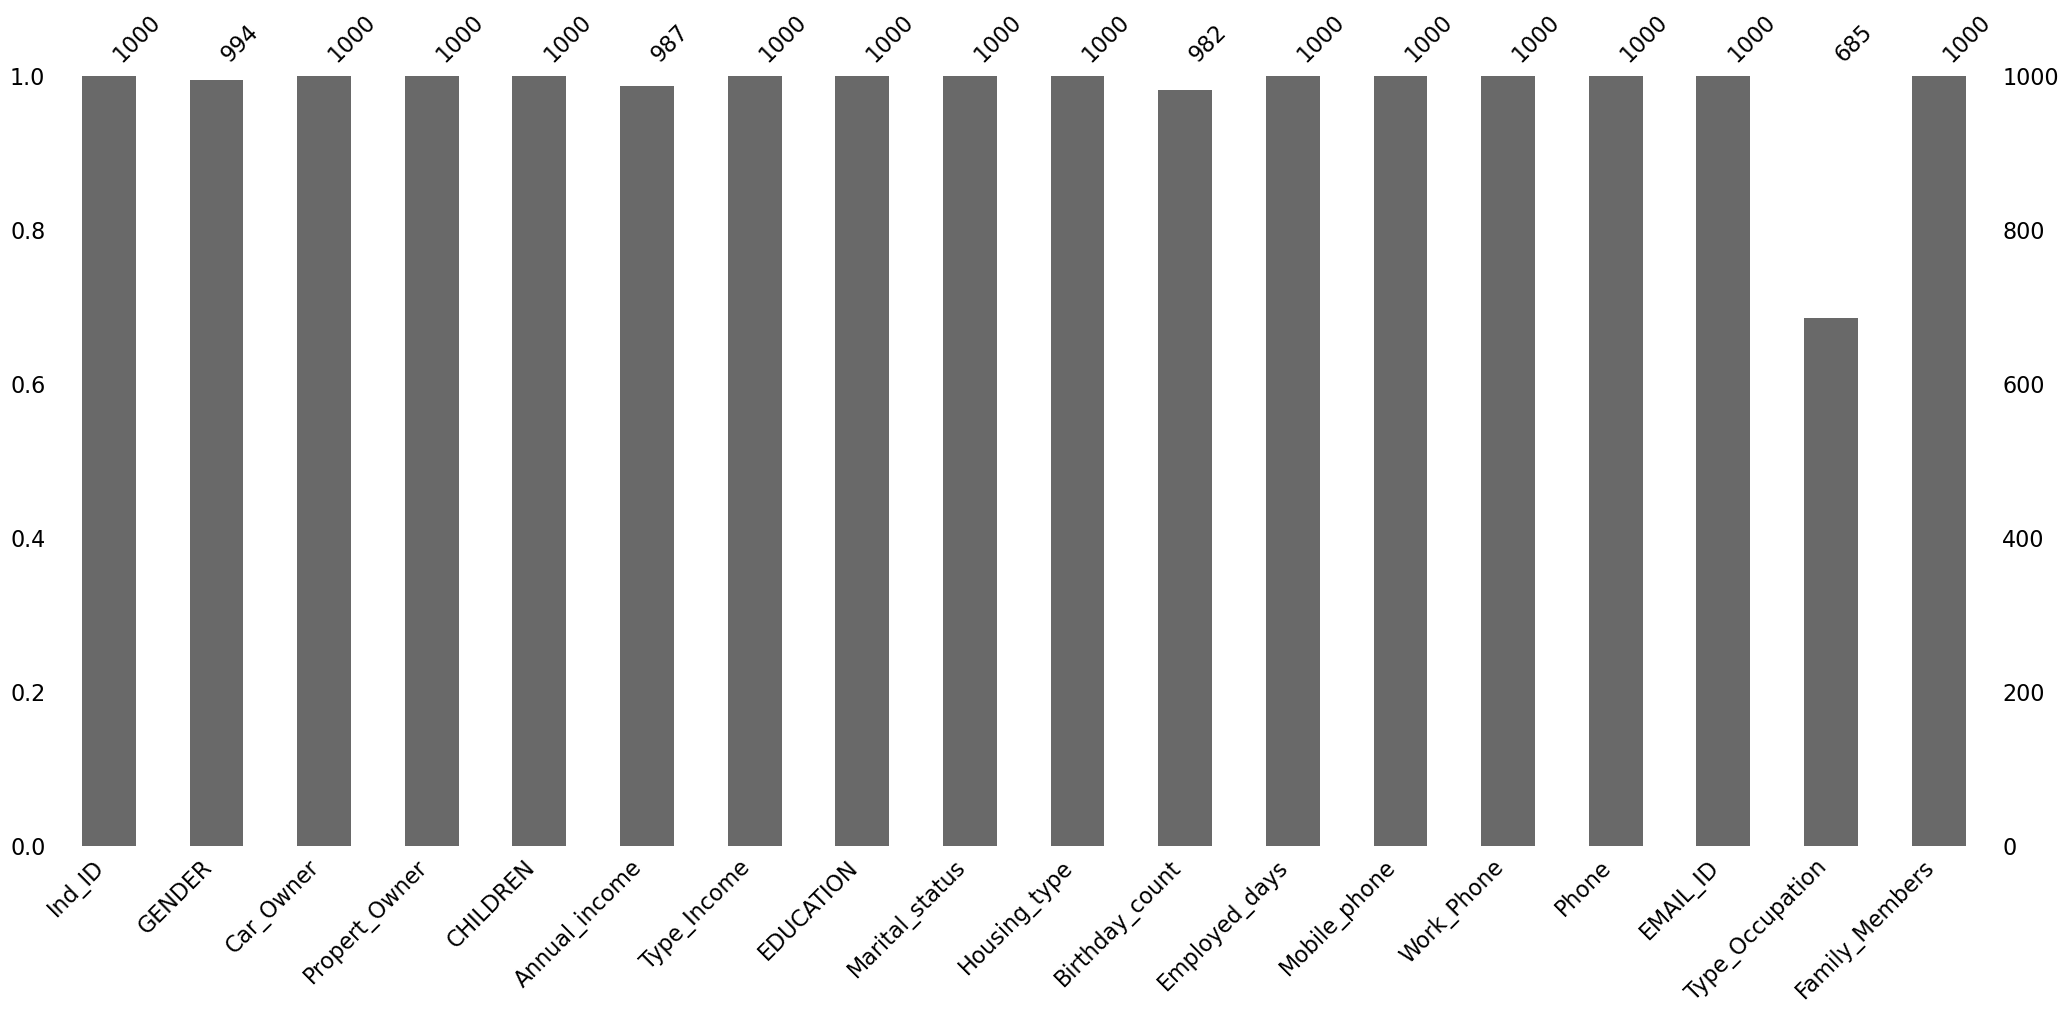

In [20]:
msno.bar(Cardapp.sample(1000))

<Axes: >

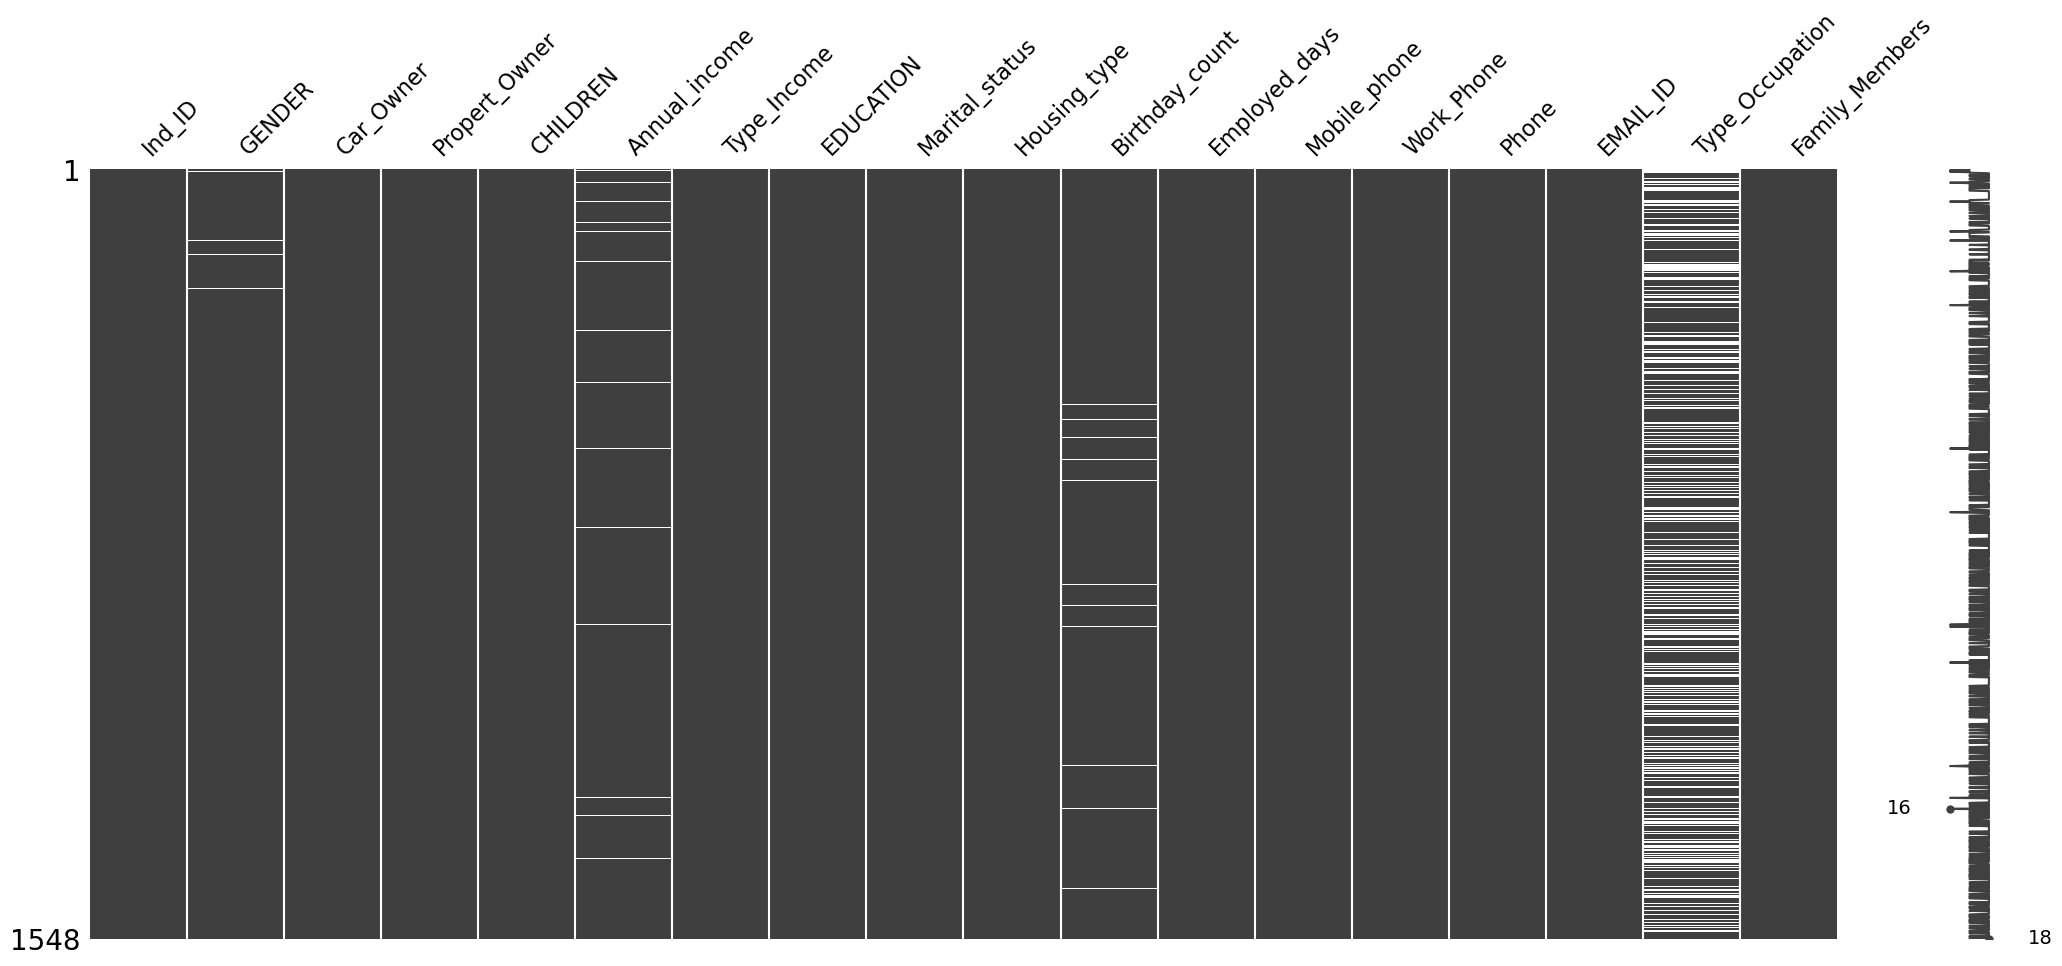

In [21]:
#creating matrix plot to see the pattern in missing values
msno.matrix(Cardapp)

# Data analysis before imputation

<Figure size 200x200 with 0 Axes>

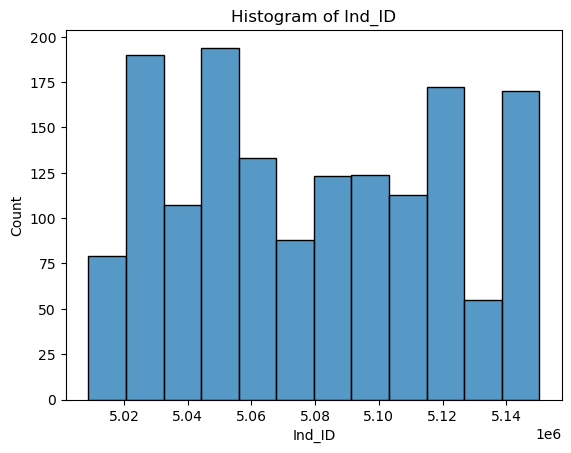

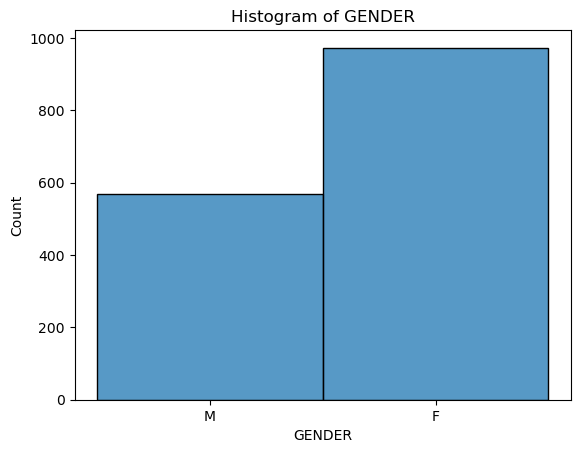

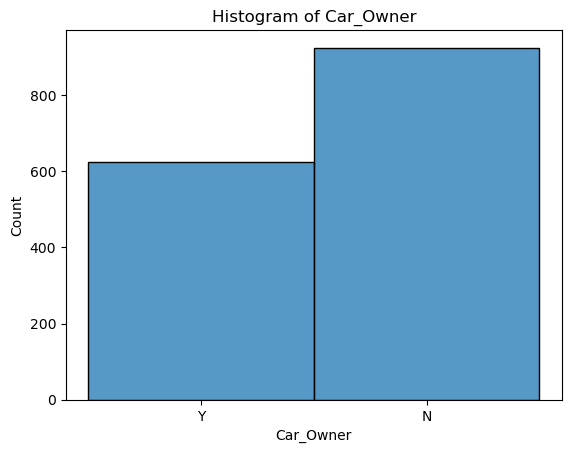

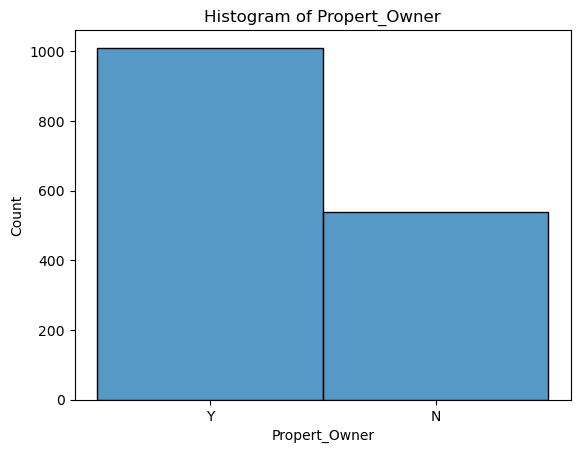

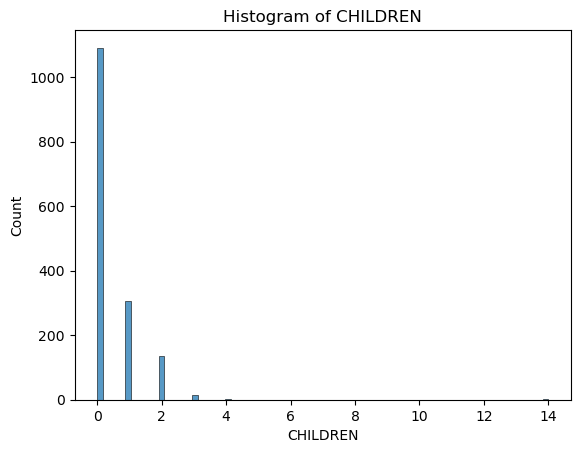

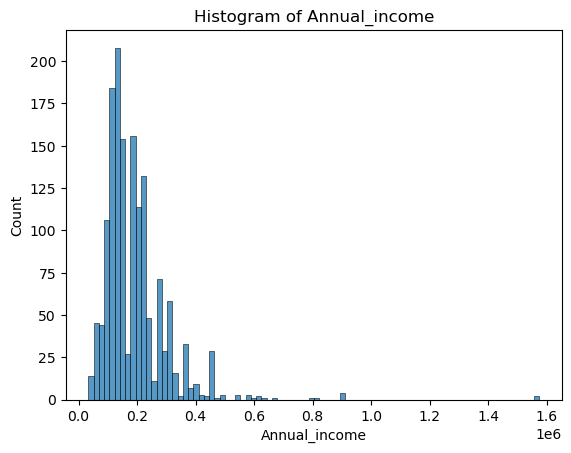

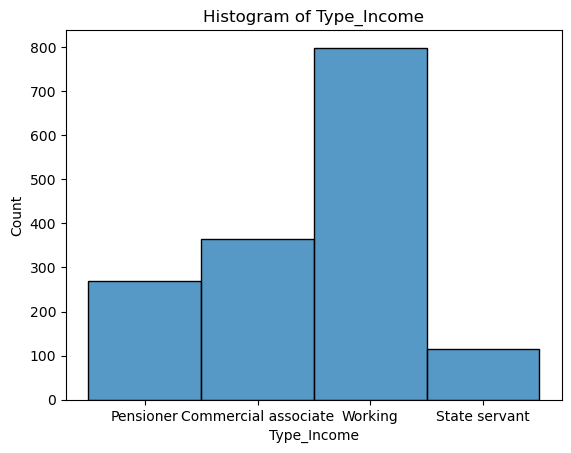

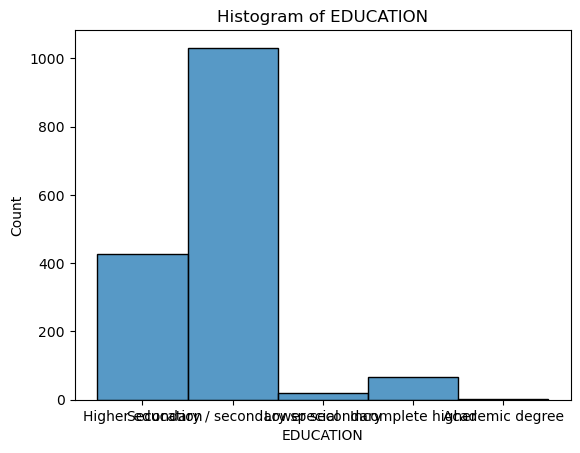

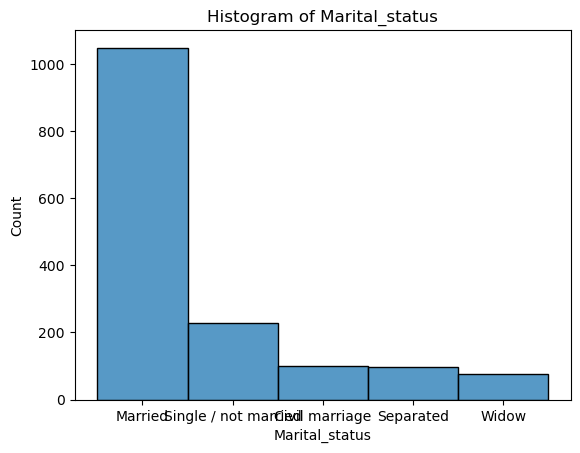

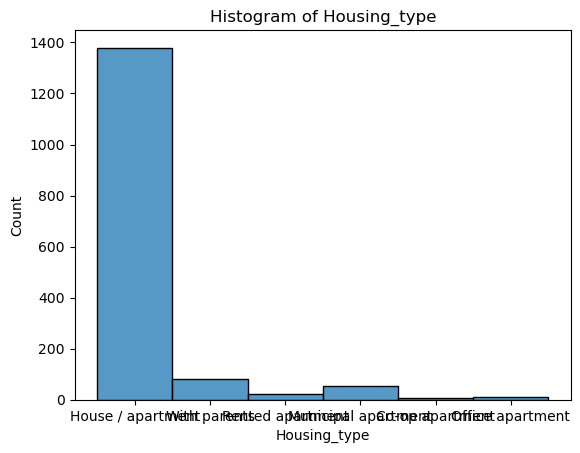

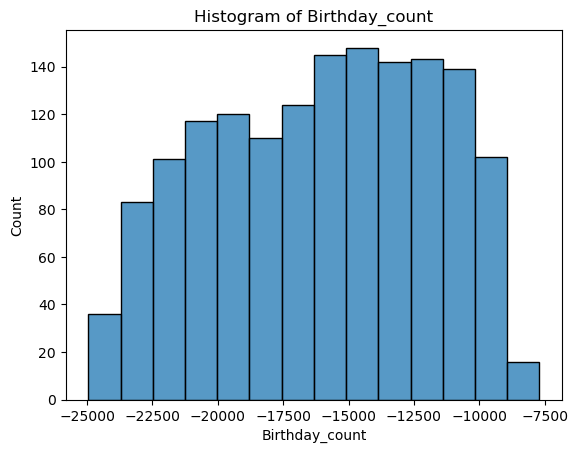

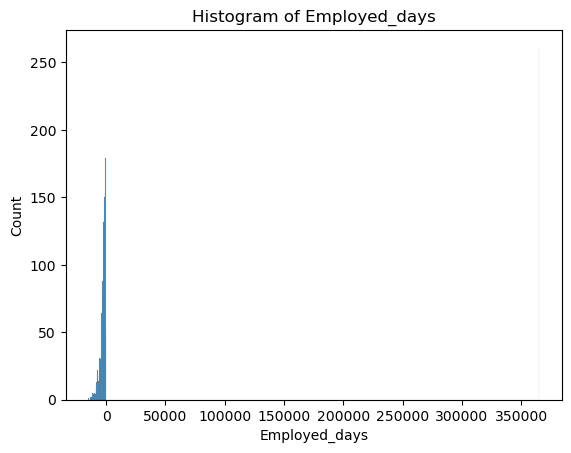

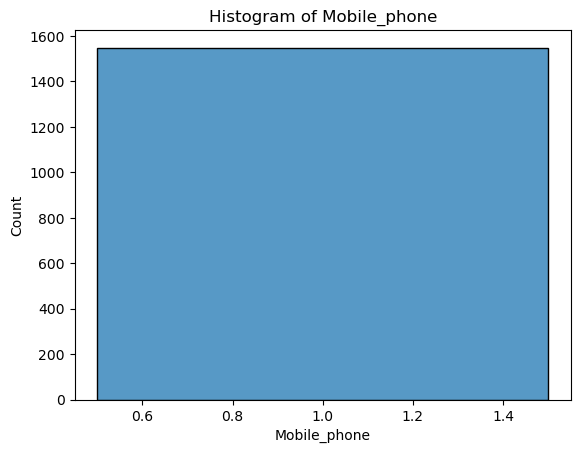

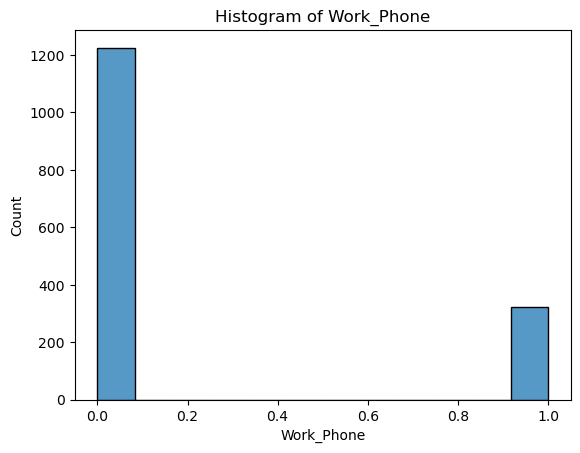

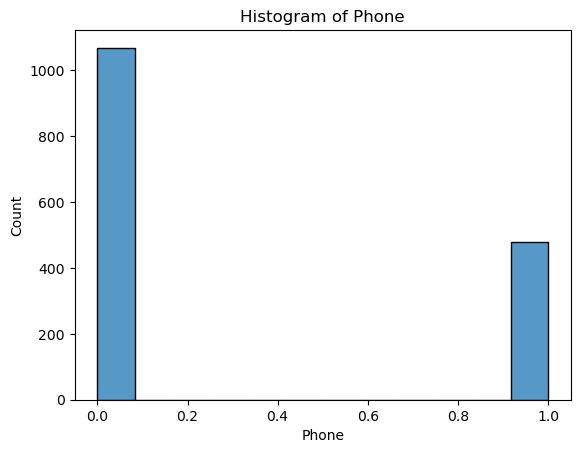

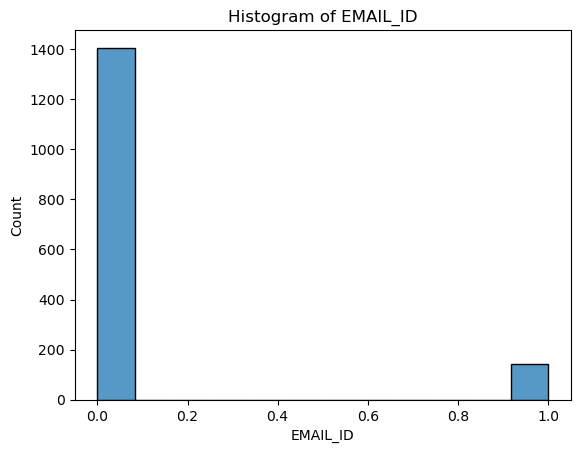

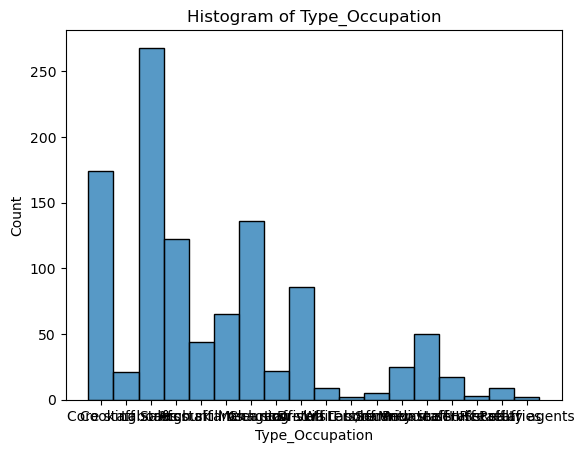

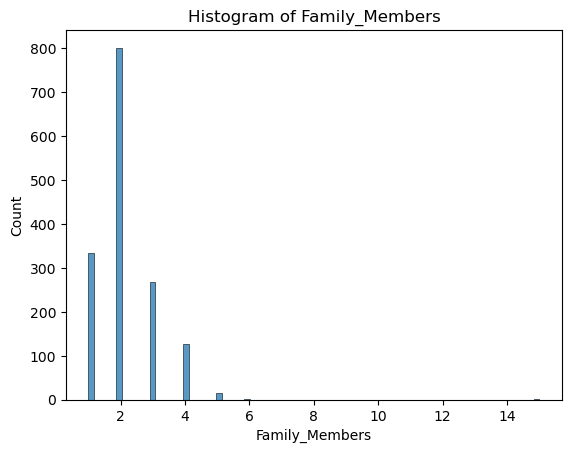

In [22]:
import seaborn as sns
plt.figure(figsize=(2,2))
for i in Cardapp:
  plt.figure()
  sns.histplot(Cardapp[i])
  plt.title(f'Histogram of {i}')
  plt.show()


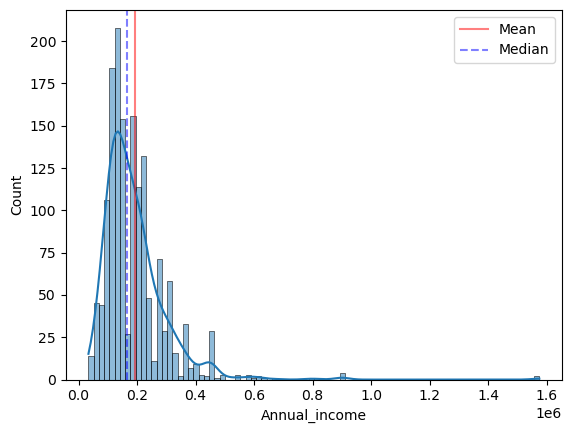

In [23]:
#check distribution
sns.histplot(data = Cardapp['Annual_income'], kde = True)
plt.axvline(x=Cardapp.Annual_income.mean(),color='red',alpha = 0.5,label='Mean')
plt.axvline(x=Cardapp.Annual_income.median(),color='blue',ls='--',alpha = 0.5,label='Median')
plt.legend()

<Axes: >

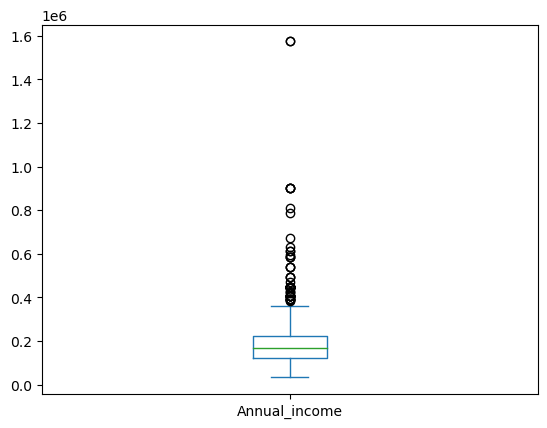

In [24]:
Cardapp["Annual_income"].plot(kind="box")

<Axes: >

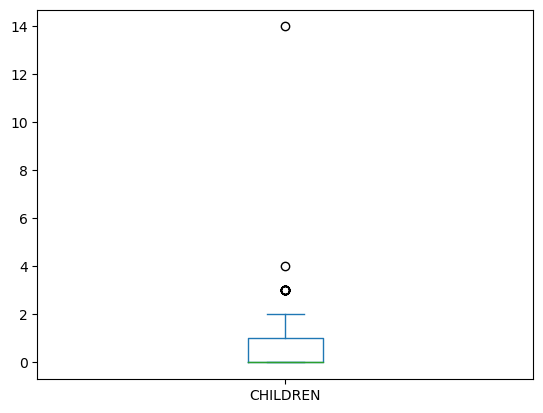

In [25]:
Cardapp["CHILDREN"].plot(kind="box")

In [26]:
Cardapp.head()

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0            NaN   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0        -18772.0         365243             1           0      0         0   
1        -13557.0           -586             1           1      1         0   
2             NaN           -586             1           1      1         0   
3        -13557.0           -586             1           1      1         0   
4        -13557.0           -586             1           1      1         0   

  Type_Occupation  Family_Members  
0             NaN               2  
1             NaN               2  
2             NaN               2  
3             NaN               2  
4             NaN               2

# Check Duplicates

In [27]:
Cardapp.drop_duplicates() # check if there are duplicates

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0     5008827      M         Y             Y         0       180000.0   
1     5009744      F         Y             N         0       315000.0   
2     5009746      F         Y             N         0       315000.0   
3     5009749      F         Y             N         0            NaN   
4     5009752      F         Y             N         0       315000.0   
...       ...    ...       ...           ...       ...            ...   
1543  5028645      F         N             Y         0            NaN   
1544  5023655      F         N             N         0       225000.0   
1545  5115992      M         Y             Y         2       180000.0   
1546  5118219      M         Y             N         0       270000.0   
1547  5053790      F         Y             Y         0       225000.0   

               Type_Income                      EDUCATION  \
0                Pensioner               Higher education   
1     Commercial associate               Higher education   
2     Commercial associate               Higher education   
3     Commercial associate               Higher education   
4     Commercial associate               Higher education   
...                    ...                            ...   
1543  Commercial associate               Higher education   
1544  Commercial associate              Incomplete higher   
1545               Working               Higher education   
1546               Working  Secondary / secondary special   
1547               Working               Higher education   

            Marital_status       Housing_type  Birthday_count  Employed_days  \
0                  Married  House / apartment        -18772.0         365243   
1                  Married  House / apartment        -13557.0           -586   
2                  Married  House / apartment             NaN           -586   
3                  Married  House / apartment        -13557.0           -586   
4                  Married  House / apartment        -13557.0           -586   
...                    ...                ...             ...            ...   
1543               Married  House / apartment        -11957.0          -2182   
1544  Single / not married  House / apartment        -10229.0          -1209   
1545               Married  House / apartment        -13174.0          -2477   
1546        Civil marriage  House / apartment        -15292.0           -645   
1547               Married  House / apartment        -16601.0          -2859   

      Mobile_phone  Work_Phone  Phone  EMAIL_ID Type_Occupation  \
0                1           0      0         0             NaN   
1                1           1      1         0             NaN   
2                1           1      1         0             NaN   
3                1           1      1         0             NaN   
4                1           1      1         0             NaN   
...            ...         ...    ...       ...             ...   
1543             1           0      0         0        Managers   
1544             1           0      0         0     Accountants   
1545             1           0      0         0        Managers   
1546             1           1      1         0         Drivers   
1547             1           0      0         0             NaN   

      Family_Members  
0                  2  
1                  2  
2                  2  
3                  2  
4                  2  
...              ...  
1543               2  
1544               1  
1545               4  
1546               2  
1547               2  

[1548 rows x 18 columns]

In [28]:
Cardapp[Cardapp.duplicated()]

Empty DataFrame
Columns: [Ind_ID, GENDER, Car_Owner, Propert_Owner, CHILDREN, Annual_income, Type_Income, EDUCATION, Marital_status, Housing_type, Birthday_count, Employed_days, Mobile_phone, Work_Phone, Phone, EMAIL_ID, Type_Occupation, Family_Members]
Index: []

# Imputation(Replacing values)

In [29]:
## Converting null values of occupation type column to others
value = 'other'
Cardapp['Type_Occupation'].fillna(value,inplace=True)



In [30]:
## Converting null values of Mobile_phone type column to others
value = 0
Cardapp['Mobile_phone'].fillna(value,inplace=True)
Cardapp


Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0     5008827      M         Y             Y         0       180000.0   
1     5009744      F         Y             N         0       315000.0   
2     5009746      F         Y             N         0       315000.0   
3     5009749      F         Y             N         0            NaN   
4     5009752      F         Y             N         0       315000.0   
...       ...    ...       ...           ...       ...            ...   
1543  5028645      F         N             Y         0            NaN   
1544  5023655      F         N             N         0       225000.0   
1545  5115992      M         Y             Y         2       180000.0   
1546  5118219      M         Y             N         0       270000.0   
1547  5053790      F         Y             Y         0       225000.0   

               Type_Income                      EDUCATION  \
0                Pensioner               Higher education   
1     Commercial associate               Higher education   
2     Commercial associate               Higher education   
3     Commercial associate               Higher education   
4     Commercial associate               Higher education   
...                    ...                            ...   
1543  Commercial associate               Higher education   
1544  Commercial associate              Incomplete higher   
1545               Working               Higher education   
1546               Working  Secondary / secondary special   
1547               Working               Higher education   

            Marital_status       Housing_type  Birthday_count  Employed_days  \
0                  Married  House / apartment        -18772.0         365243   
1                  Married  House / apartment        -13557.0           -586   
2                  Married  House / apartment             NaN           -586   
3                  Married  House / apartment        -13557.0           -586   
4                  Married  House / apartment        -13557.0           -586   
...                    ...                ...             ...            ...   
1543               Married  House / apartment        -11957.0          -2182   
1544  Single / not married  House / apartment        -10229.0          -1209   
1545               Married  House / apartment        -13174.0          -2477   
1546        Civil marriage  House / apartment        -15292.0           -645   
1547               Married  House / apartment        -16601.0          -2859   

      Mobile_phone  Work_Phone  Phone  EMAIL_ID Type_Occupation  \
0                1           0      0         0           other   
1                1           1      1         0           other   
2                1           1      1         0           other   
3                1           1      1         0           other   
4                1           1      1         0           other   
...            ...         ...    ...       ...             ...   
1543             1           0      0         0        Managers   
1544             1           0      0         0     Accountants   
1545             1           0      0         0        Managers   
1546             1           1      1         0         Drivers   
1547             1           0      0         0           other   

      Family_Members  
0                  2  
1                  2  
2                  2  
3                  2  
4                  2  
...              ...  
1543               2  
1544               1  
1545               4  
1546               2  
1547               2  

[1548 rows x 18 columns]

### **Deleting unnecessary rows**

In [31]:
#Drop rows with NaN values in the 'GENDER' column
Cardapp.dropna(subset=['GENDER'], inplace=True)

# Display the updated DataFrame
print(Cardapp)

       Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0     5008827      M         Y             Y         0       180000.0   
1     5009744      F         Y             N         0       315000.0   
2     5009746      F         Y             N         0       315000.0   
3     5009749      F         Y             N         0            NaN   
4     5009752      F         Y             N         0       315000.0   
...       ...    ...       ...           ...       ...            ...   
1543  5028645      F         N             Y         0            NaN   
1544  5023655      F         N             N         0       225000.0   
1545  5115992      M         Y             Y         2       180000.0   
1546  5118219      M         Y             N         0       270000.0   
1547  5053790      F         Y             Y         0       225000.0   

               Type_Income                      EDUCATION  \
0                Pensioner               Higher education   
1

In [32]:
#percentage of missing values
Cardapp.isnull().sum()/len(Cardapp) 

Ind_ID             0.000000
GENDER             0.000000
Car_Owner          0.000000
Propert_Owner      0.000000
CHILDREN           0.000000
Annual_income      0.014925
Type_Income        0.000000
EDUCATION          0.000000
Marital_status     0.000000
Housing_type       0.000000
Birthday_count     0.014276
Employed_days      0.000000
Mobile_phone       0.000000
Work_Phone         0.000000
Phone              0.000000
EMAIL_ID           0.000000
Type_Occupation    0.000000
Family_Members     0.000000
dtype: float64

In [33]:
# Calculate the median of the 'Income' column
median_income = Cardapp['Annual_income'].median()

# Replace null values with the median in the 'Income' column
Cardapp['Annual_income'].fillna(median_income, inplace=True)

# Display the updated DataFrame
print(Cardapp)

       Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0     5008827      M         Y             Y         0       180000.0   
1     5009744      F         Y             N         0       315000.0   
2     5009746      F         Y             N         0       315000.0   
3     5009749      F         Y             N         0       162000.0   
4     5009752      F         Y             N         0       315000.0   
...       ...    ...       ...           ...       ...            ...   
1543  5028645      F         N             Y         0       162000.0   
1544  5023655      F         N             N         0       225000.0   
1545  5115992      M         Y             Y         2       180000.0   
1546  5118219      M         Y             N         0       270000.0   
1547  5053790      F         Y             Y         0       225000.0   

               Type_Income                      EDUCATION  \
0                Pensioner               Higher education   
1

In [34]:
# Calculate the median of the 'Birthday_count ' column
median_Birth = Cardapp['Birthday_count'].median()

# Replace null values with the median in the 'Birthday_count' column
Cardapp['Birthday_count'].fillna(median_Birth, inplace=True)

# Display the updated DataFrame
print(Cardapp)

       Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0     5008827      M         Y             Y         0       180000.0   
1     5009744      F         Y             N         0       315000.0   
2     5009746      F         Y             N         0       315000.0   
3     5009749      F         Y             N         0       162000.0   
4     5009752      F         Y             N         0       315000.0   
...       ...    ...       ...           ...       ...            ...   
1543  5028645      F         N             Y         0       162000.0   
1544  5023655      F         N             N         0       225000.0   
1545  5115992      M         Y             Y         2       180000.0   
1546  5118219      M         Y             N         0       270000.0   
1547  5053790      F         Y             Y         0       225000.0   

               Type_Income                      EDUCATION  \
0                Pensioner               Higher education   
1

In [35]:
#percentage of missing values
Cardapp.isnull().sum()/len(Cardapp) 

Ind_ID             0.0
GENDER             0.0
Car_Owner          0.0
Propert_Owner      0.0
CHILDREN           0.0
Annual_income      0.0
Type_Income        0.0
EDUCATION          0.0
Marital_status     0.0
Housing_type       0.0
Birthday_count     0.0
Employed_days      0.0
Mobile_phone       0.0
Work_Phone         0.0
Phone              0.0
EMAIL_ID           0.0
Type_Occupation    0.0
Family_Members     0.0
dtype: float64

In [36]:
for column in Cardapp:
    unique_value=Cardapp[column].unique()
    print(f'unique Value in {column}:',unique_value)

unique Value in Ind_ID: [5008827 5009744 5009746 ... 5115992 5118219 5053790]
unique Value in GENDER: ['M' 'F']
unique Value in Car_Owner: ['Y' 'N']
unique Value in Propert_Owner: ['Y' 'N']
unique Value in CHILDREN: [ 0  1  2  4  3 14]
unique Value in Annual_income: [ 180000.   315000.   162000.   450000.    90000.   472500.   270000.
  126000.   202500.   157500.   112500.   540000.   135000.   292500.
   76500.   215100.   225000.    67500.   171000.   103500.    99000.
  391500.    65250.    72900.   256500.   675000.   247500.    85500.
  121500.   130500.   211500.    81000.    72000.   148500.   195750.
  585000.   216000.   306000.   108000.    63000.    45000.   337500.
  131400.   117000.   445500.   234000.  1575000.   144000.    67050.
   73350.   193500.   900000.   360000.    94500.   198000.    54000.
  166500.   167400.   153000.   423000.   243000.   283500.   252000.
  495000.   612000.    36000.   139500.   133650.   427500.   261000.
  231750.    90900.    45900.   1

In [37]:
# percentage of missing values
Cardapp.isnull().sum()

Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Birthday_count     0
Employed_days      0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Type_Occupation    0
Family_Members     0
dtype: int64

In [38]:
Cardapp.nunique()

Ind_ID             1541
GENDER                2
Car_Owner             2
Propert_Owner         2
CHILDREN              6
Annual_income       115
Type_Income           4
EDUCATION             5
Marital_status        5
Housing_type          6
Birthday_count     1266
Employed_days       953
Mobile_phone          1
Work_Phone            2
Phone                 2
EMAIL_ID              2
Type_Occupation      19
Family_Members        7
dtype: int64

# Adding target column

In [39]:
#target
Cardapp['Type_Income'].value_counts()


Type_Income
Working                 795
Commercial associate    364
Pensioner               267
State servant           115
Name: count, dtype: int64

In [40]:
def solve(state):
    target=''
    if state in (2,3,4,5):
        target=1 #Risky
    else :
        target=0 #not Risky
        
    return target


In [41]:
Cardapp['Target']=Cardapp['Type_Income'].apply(solve)

In [42]:
Cardapp['Target'].value_counts()

Cardapp.head()


Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0       162000.0   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0        -18772.0         365243             1           0      0         0   
1        -13557.0           -586             1           1      1         0   
2        -15702.0           -586             1           1      1         0   
3        -13557.0           -586             1           1      1         0   
4        -13557.0           -586             1           1      1         0   

  Type_Occupation  Family_Members  Target  
0           other               2       0  
1           other               2       0  
2           other               2       0  
3           other               2       0  
4           other               2       0

In [43]:
#saving clean data
Cardapp.to_csv("G:\odin\clean_data")

# Univariate and Bivariate Analysis

<Axes: xlabel='GENDER', ylabel='count'>

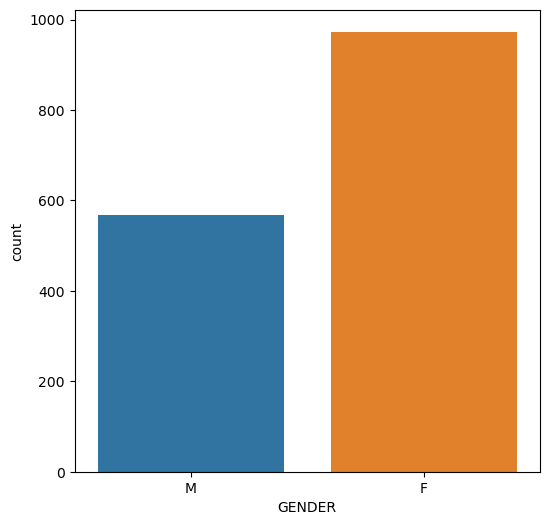

In [44]:
plt.figure(figsize = (6,6))
sns.countplot(x=Cardapp["GENDER"])

<Axes: ylabel='Density'>

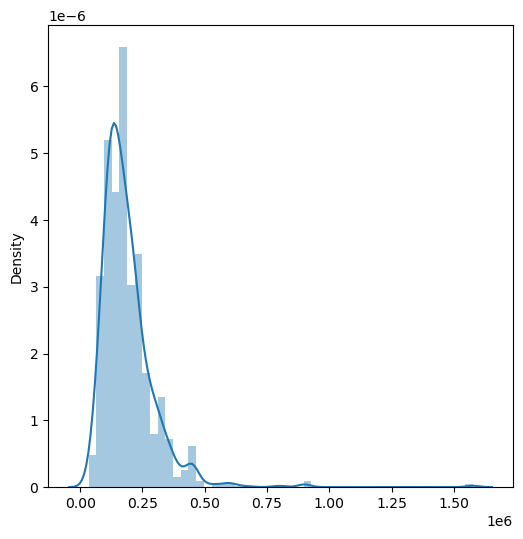

In [45]:
plt.figure(figsize = (6,6))
sns.distplot(x=Cardapp.Annual_income)


In [46]:
Cardapp.head()

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0       162000.0   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0        -18772.0         365243             1           0      0         0   
1        -13557.0           -586             1           1      1         0   
2        -15702.0           -586             1           1      1         0   
3        -13557.0           -586             1           1      1         0   
4        -13557.0           -586             1           1      1         0   

  Type_Occupation  Family_Members  Target  
0           other               2       0  
1           other               2       0  
2           other               2       0  
3           other               2       0  
4           other               2       0

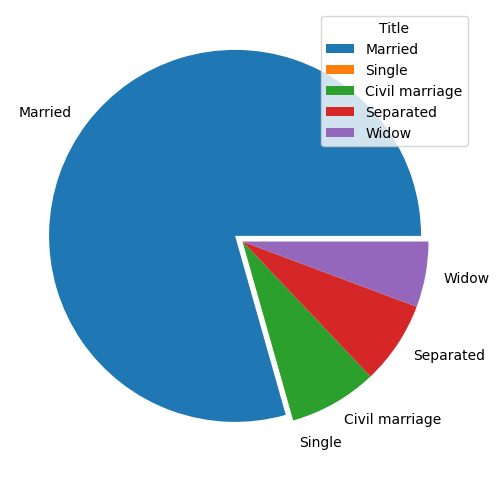

In [47]:
plt.figure(figsize=(6,8))
e=(0.05,0.02,0,0,0)
m=Cardapp['Marital_status']=='Married'
m=m.sum()
s=Cardapp['Marital_status']=='Single'
s=s.sum()
Cv=Cardapp['Marital_status']=='Civil marriage'
Cv=Cv.sum()
sep=Cardapp['Marital_status']=='Separated'
sep=sep.sum()
w=Cardapp['Marital_status']=='Widow'
w=w.sum()
y=np.array([m,s,Cv,sep,w])
label=['Married','Single','Civil marriage','Separated','Widow']
plt.pie(y,explode=e,labels=label)
plt.legend(title="Title")

In [48]:
Cardapp['Housing_type'].value_counts()

Housing_type
House / apartment      1374
With parents             79
Municipal apartment      53
Rented apartment         21
Office apartment          9
Co-op apartment           5
Name: count, dtype: int64

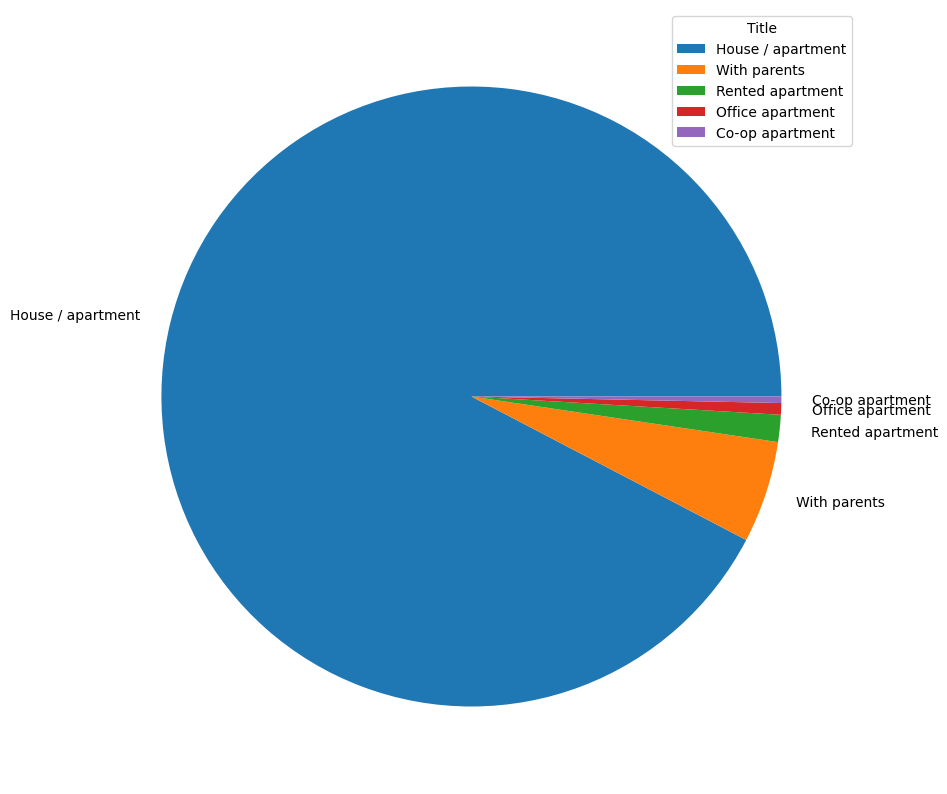

In [49]:
plt.figure(figsize=(10,12))
e=(0.0,0.0,0,0,0)
m=Cardapp['Housing_type']=='House / apartment'
m=m.sum()
s=Cardapp['Housing_type']=='With parents'
s=s.sum()
Cv=Cardapp['Housing_type']=='Rented apartment'
Cv=Cv.sum()
sep=Cardapp['Housing_type']=='Office apartment'
sep=sep.sum()
w=Cardapp['Housing_type']=='Co-op apartment'
w=w.sum()
y=np.array([m,s,Cv,sep,w])
label=['House / apartment','With parents','Rented apartment','Office apartment','Co-op apartment']
plt.pie(y,explode=e,labels=label)
plt.legend(title="Title")

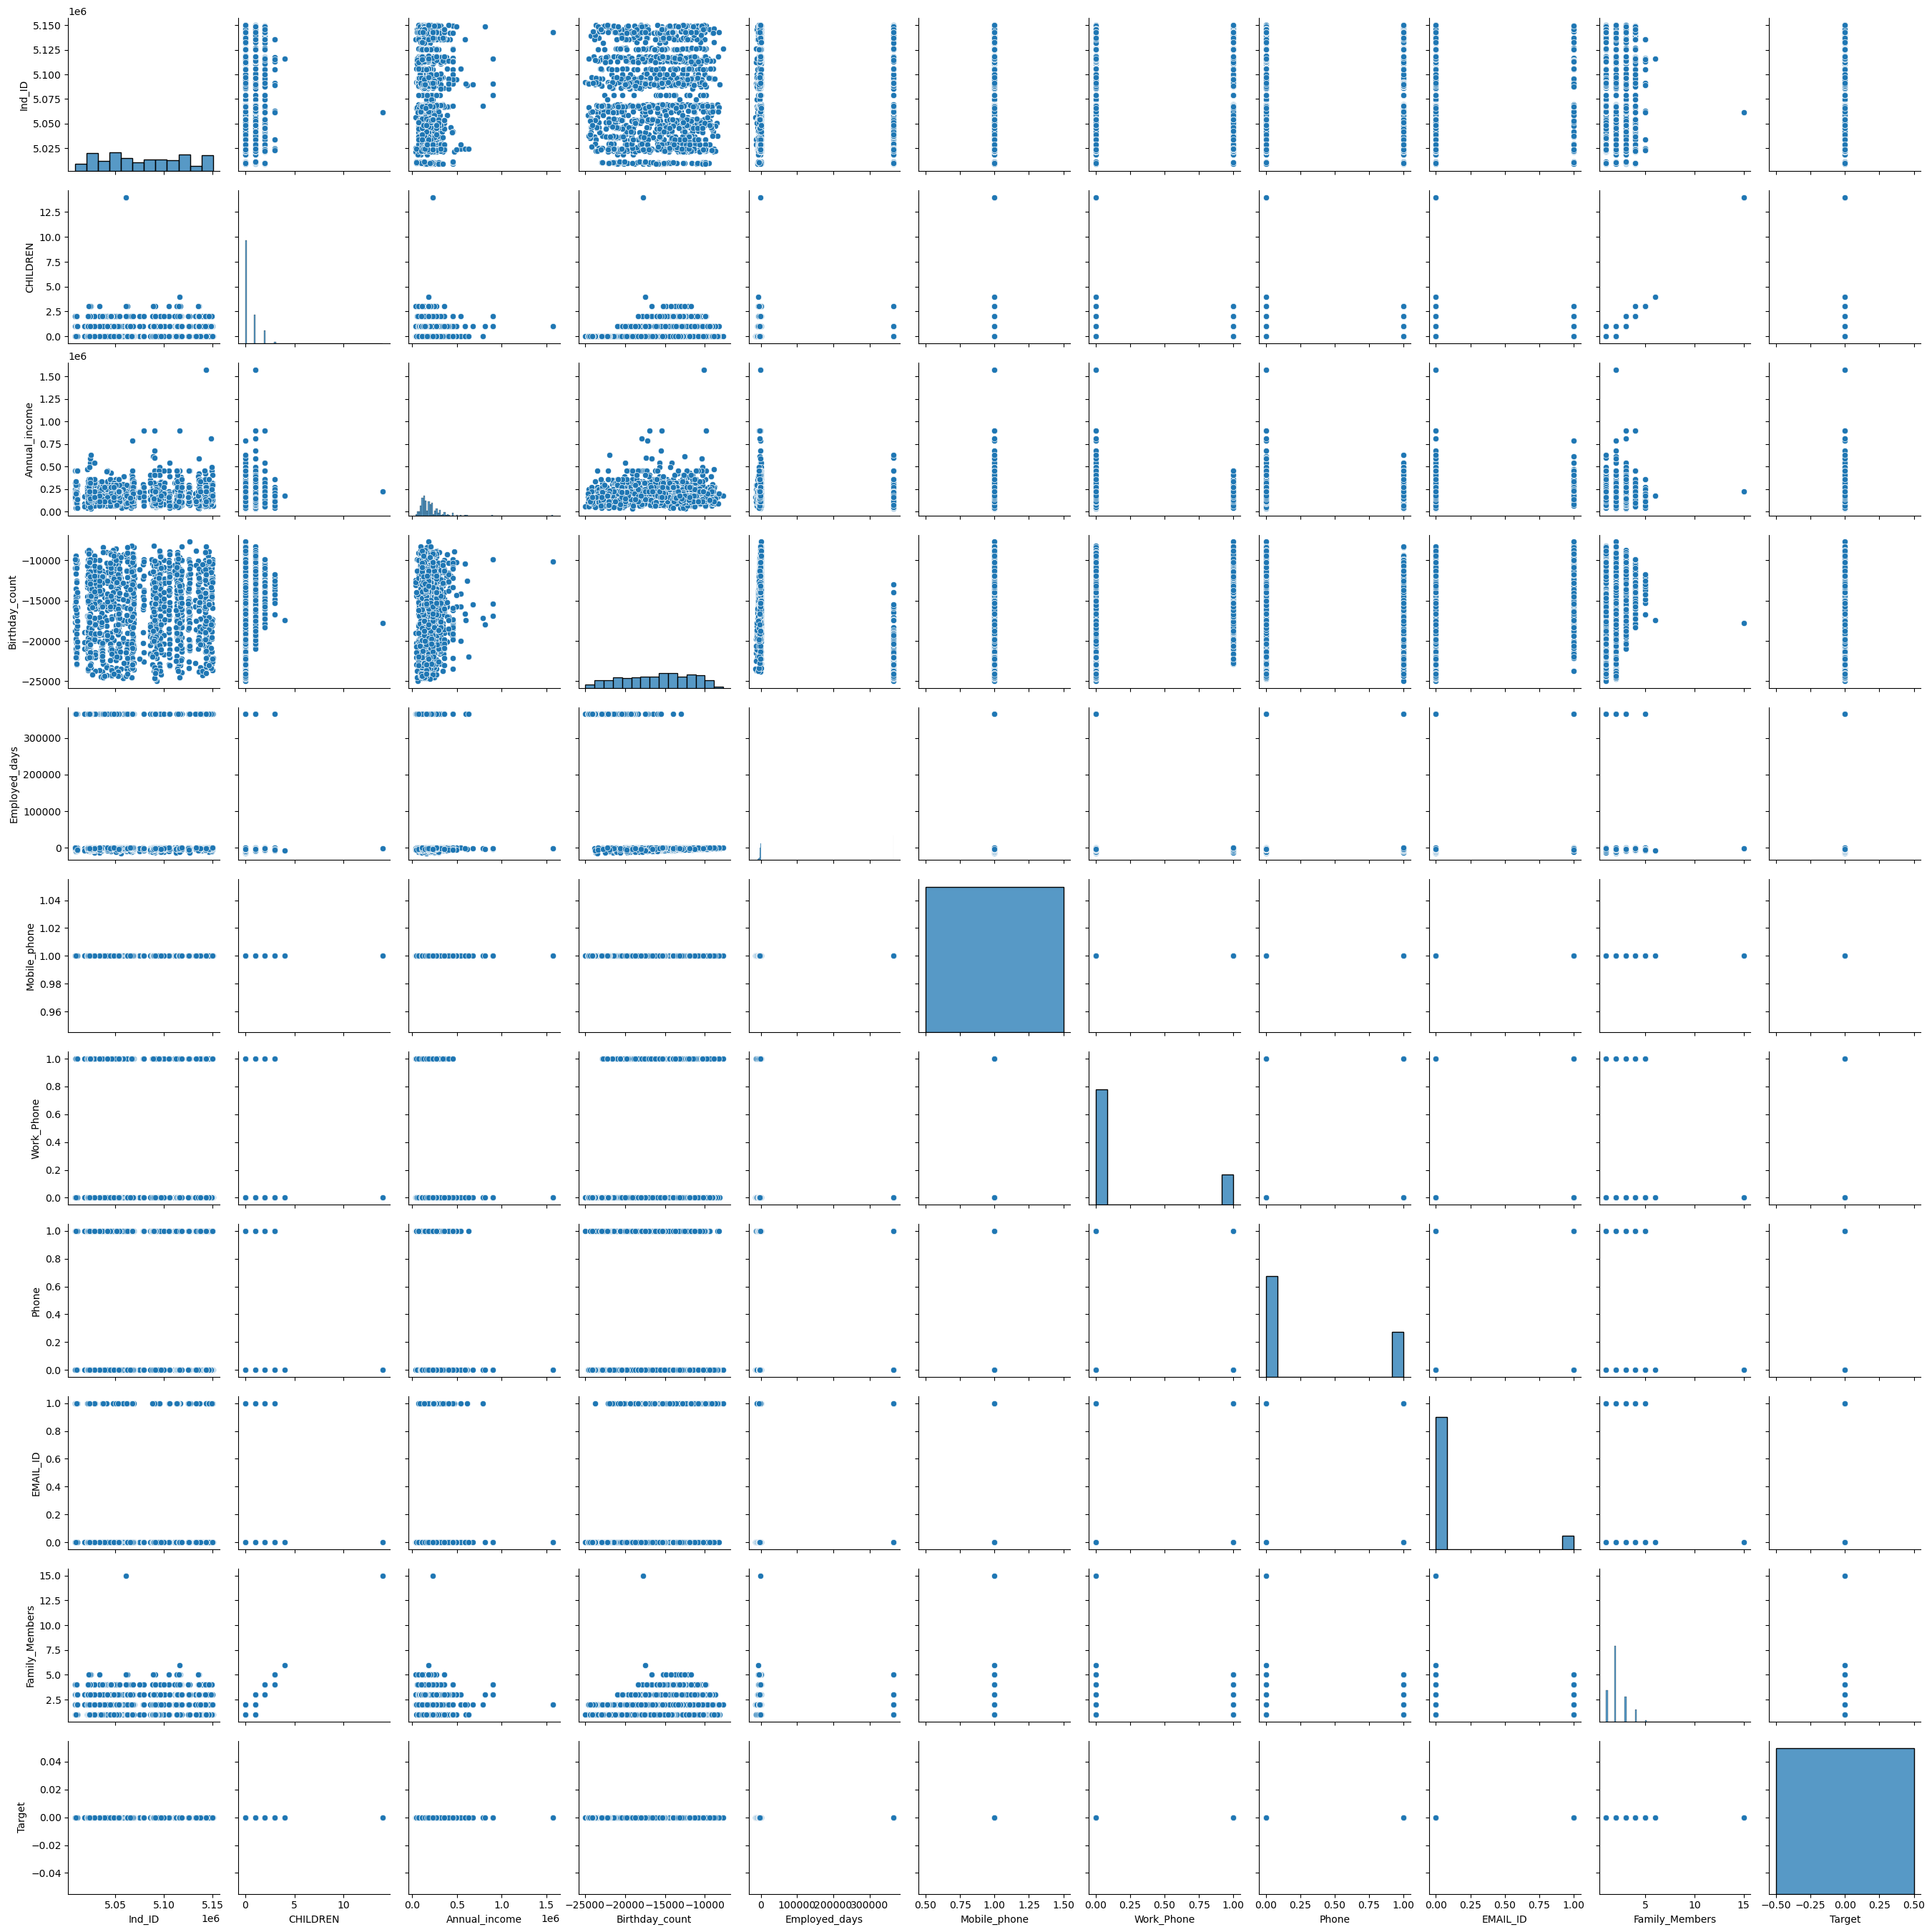

In [50]:
sns.pairplot(Cardapp)














# Feature Engineering

# Label Encoding

In [51]:
#to convert categirical to numerical
from sklearn.preprocessing import LabelEncoder

In [52]:
le=LabelEncoder()

In [53]:
Cardapp["Type_Income"]=le.fit_transform(Cardapp["Type_Income"])
Cardapp["EDUCATION"]=le.fit_transform(Cardapp["EDUCATION"])
Cardapp["Type_Occupation"]=le.fit_transform(Cardapp["Type_Occupation"])
Cardapp["Housing_type"]=le.fit_transform(Cardapp["Housing_type"])
Cardapp["Marital_status"]=le.fit_transform(Cardapp["Marital_status"])


In [54]:
#drop unwanted coloumns
Cardapp.drop(['GENDER','Car_Owner','Propert_Owner','Type_Occupation'],inplace=True,axis=1)

In [55]:
Cardapp.head()

Ind_ID  CHILDREN  Annual_income  Type_Income  EDUCATION  Marital_status  \
0  5008827         0       180000.0            1          1               1   
1  5009744         0       315000.0            0          1               1   
2  5009746         0       315000.0            0          1               1   
3  5009749         0       162000.0            0          1               1   
4  5009752         0       315000.0            0          1               1   

   Housing_type  Birthday_count  Employed_days  Mobile_phone  Work_Phone  \
0             1        -18772.0         365243             1           0   
1             1        -13557.0           -586             1           1   
2             1        -15702.0           -586             1           1   
3             1        -13557.0           -586             1           1   
4             1        -13557.0           -586             1           1   

   Phone  EMAIL_ID  Family_Members  Target  
0      0         0               2       0  
1      1         0               2       0  
2      1         0               2       0  
3      1         0               2       0  
4      1         0               2       0

In [56]:
Cardapp.corr()

Ind_ID  CHILDREN  Annual_income  Type_Income  EDUCATION  \
Ind_ID          1.000000  0.031011       0.032475     0.025718   0.018963   
CHILDREN        0.031011  1.000000       0.078034     0.061476  -0.064938   
Annual_income   0.032475  0.078034       1.000000    -0.135572  -0.238637   
Type_Income     0.025718  0.061476      -0.135572     1.000000   0.100740   
EDUCATION       0.018963 -0.064938      -0.238637     0.100740   1.000000   
Marital_status  0.015626 -0.158561       0.004093    -0.031168   0.053482   
Housing_type    0.027933  0.004394       0.014300     0.029654  -0.042034   
Birthday_count  0.024777  0.278397       0.108216     0.171800  -0.187837   
Employed_days  -0.058307 -0.219120      -0.157230    -0.309161   0.126205   
Mobile_phone         NaN       NaN            NaN          NaN        NaN   
Work_Phone      0.088162  0.035572      -0.070528     0.152877  -0.012514   
Phone           0.010014 -0.006054      -0.012056     0.012872  -0.021754   
EMAIL_ID       -0.042415  0.023954       0.119965    -0.038057  -0.124062   
Family_Members  0.015050  0.890441       0.050989     0.066975  -0.065774   
Target               NaN       NaN            NaN          NaN        NaN   

                Marital_status  Housing_type  Birthday_count  Employed_days  \
Ind_ID                0.015626      0.027933        0.024777      -0.058307   
CHILDREN             -0.158561      0.004394        0.278397      -0.219120   
Annual_income         0.004093      0.014300        0.108216      -0.157230   
Type_Income          -0.031168      0.029654        0.171800      -0.309161   
EDUCATION             0.053482     -0.042034       -0.187837       0.126205   
Marital_status        1.000000     -0.013630       -0.116983       0.178399   
Housing_type         -0.013630      1.000000        0.217660      -0.099808   
Birthday_count       -0.116983      0.217660        1.000000      -0.614112   
Employed_days         0.178399     -0.099808       -0.614112       1.000000   
Mobile_phone               NaN           NaN             NaN            NaN   
Work_Phone           -0.081082      0.040479        0.173957      -0.231505   
Phone                -0.004054     -0.042723       -0.032602      -0.001118   
EMAIL_ID             -0.054507      0.021033        0.164491      -0.118025   
Family_Members       -0.535725      0.004855        0.265597      -0.239585   
Target                     NaN           NaN             NaN            NaN   

                Mobile_phone  Work_Phone     Phone  EMAIL_ID  Family_Members  \
Ind_ID                   NaN    0.088162  0.010014 -0.042415        0.015050   
CHILDREN                 NaN    0.035572 -0.006054  0.023954        0.890441   
Annual_income            NaN   -0.070528 -0.012056  0.119965        0.050989   
Type_Income              NaN    0.152877  0.012872 -0.038057        0.066975   
EDUCATION                NaN   -0.012514 -0.021754 -0.124062       -0.065774   
Marital_status           NaN   -0.081082 -0.004054 -0.054507       -0.535725   
Housing_type             NaN    0.040479 -0.042723  0.021033        0.004855   
Birthday_count           NaN    0.173957 -0.032602  0.164491        0.265597   
Employed_days            NaN   -0.231505 -0.001118 -0.118025       -0.239585   
Mobile_phone             NaN         NaN       NaN       NaN             NaN   
Work_Phone               NaN    1.000000  0.353164 -0.008726        0.072338   
Phone                    NaN    0.353164  1.000000  0.015692        0.004357   
EMAIL_ID                 NaN   -0.008726  0.015692  1.000000        0.033039   
Family_Members           NaN    0.072338  0.004357  0.033039        1.000000   
Target                   NaN         NaN       NaN       NaN             NaN   

                Target  
Ind_ID             NaN  
CHILDREN           NaN  
Annual_income      NaN  
Type_Income        NaN  
EDUCATION          NaN  
Marital_status     NaN  
Housing_type       NaN  
Birthday_count     NaN  
Employed_days 

## Data Splitting

In [57]:
X=Cardapp.drop('Target',axis=1)
y=Cardapp['Target']

## Scaling

In [58]:
#scale the values of all variable to same scale
feature_scale = [feature for feature in Cardapp.columns if feature!='Target']

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X)

MinMaxScaler()

In [59]:
scaler.transform(X)

array([[0.        , 0.        , 0.09489051, ..., 0.        , 0.        ,
        0.07142857],
       [0.00647667, 0.        , 0.18248175, ..., 1.        , 0.        ,
        0.07142857],
       [0.0064908 , 0.        , 0.18248175, ..., 1.        , 0.        ,
        0.07142857],
       ...,
       [0.75689515, 0.14285714, 0.09489051, ..., 0.        , 0.        ,
        0.21428571],
       [0.77262422, 0.        , 0.15328467, ..., 1.        , 0.        ,
        0.07142857],
       [0.31756895, 0.        , 0.12408759, ..., 0.        , 0.        ,
        0.07142857]])

In [60]:
#this code is creating a new DataFrame data by combining the 'Target' column from the original data 
#DataFrame with the scaled features obtained from the x DataFrame using a specified scaler. The resulting DataFrame is 
#ready for further analysis or modeling, with the 'Target' column and scaled features side by side

Cardapp = pd.concat([Cardapp['Target'].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(X), columns=feature_scale)],
                    axis=1)

In [61]:
Cardapp.head()

Target    Ind_ID  CHILDREN  Annual_income  Type_Income  EDUCATION  \
0       0  0.000000       0.0       0.094891     0.333333       0.25   
1       0  0.006477       0.0       0.182482     0.000000       0.25   
2       0  0.006491       0.0       0.182482     0.000000       0.25   
3       0  0.006512       0.0       0.083212     0.000000       0.25   
4       0  0.006533       0.0       0.182482     0.000000       0.25   

   Marital_status  Housing_type  Birthday_count  Employed_days  Mobile_phone  \
0            0.25           0.2        0.358100       1.000000           0.0   
1            0.25           0.2        0.660577       0.037621           0.0   
2            0.25           0.2        0.536164       0.037621           0.0   
3            0.25           0.2        0.660577       0.037621           0.0   
4            0.25           0.2        0.660577       0.037621           0.0   

   Work_Phone  Phone  EMAIL_ID  Family_Members  
0         0.0    0.0       0.0        0.071429  
1         1.0    1.0       0.0        0.071429  
2         1.0    1.0       0.0        0.071429  
3         1.0    1.0       0.0        0.071429  
4         1.0    1.0       0.0        0.071429

In [62]:
Cardapp.Target.value_counts()

Target
0    1541
Name: count, dtype: int64

# Feature Selection - Using Chi-Square Test

In [63]:
#Libraries required for chi test
from sklearn import datasets
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split

In [74]:
X=Cardapp.drop('Target',axis=1)
y=Cardapp['Target']
selector = SelectKBest(score_func=chi2, k='all')
X_new = selector.fit_transform(X,y)
p_values = selector.pvalues_
p_values_df = pd.DataFrame({'Feature': X.columns, 'P_values':p_values})
print(p_values_df)

           Feature  P_values
0           Ind_ID       NaN
1         CHILDREN       NaN
2    Annual_income       NaN
3      Type_Income       NaN
4        EDUCATION       NaN
5   Marital_status       NaN
6     Housing_type       NaN
7   Birthday_count       NaN
8    Employed_days       NaN
9     Mobile_phone       NaN
10      Work_Phone       NaN
11           Phone       NaN
12        EMAIL_ID       NaN
13  Family_Members       NaN


<Axes: >

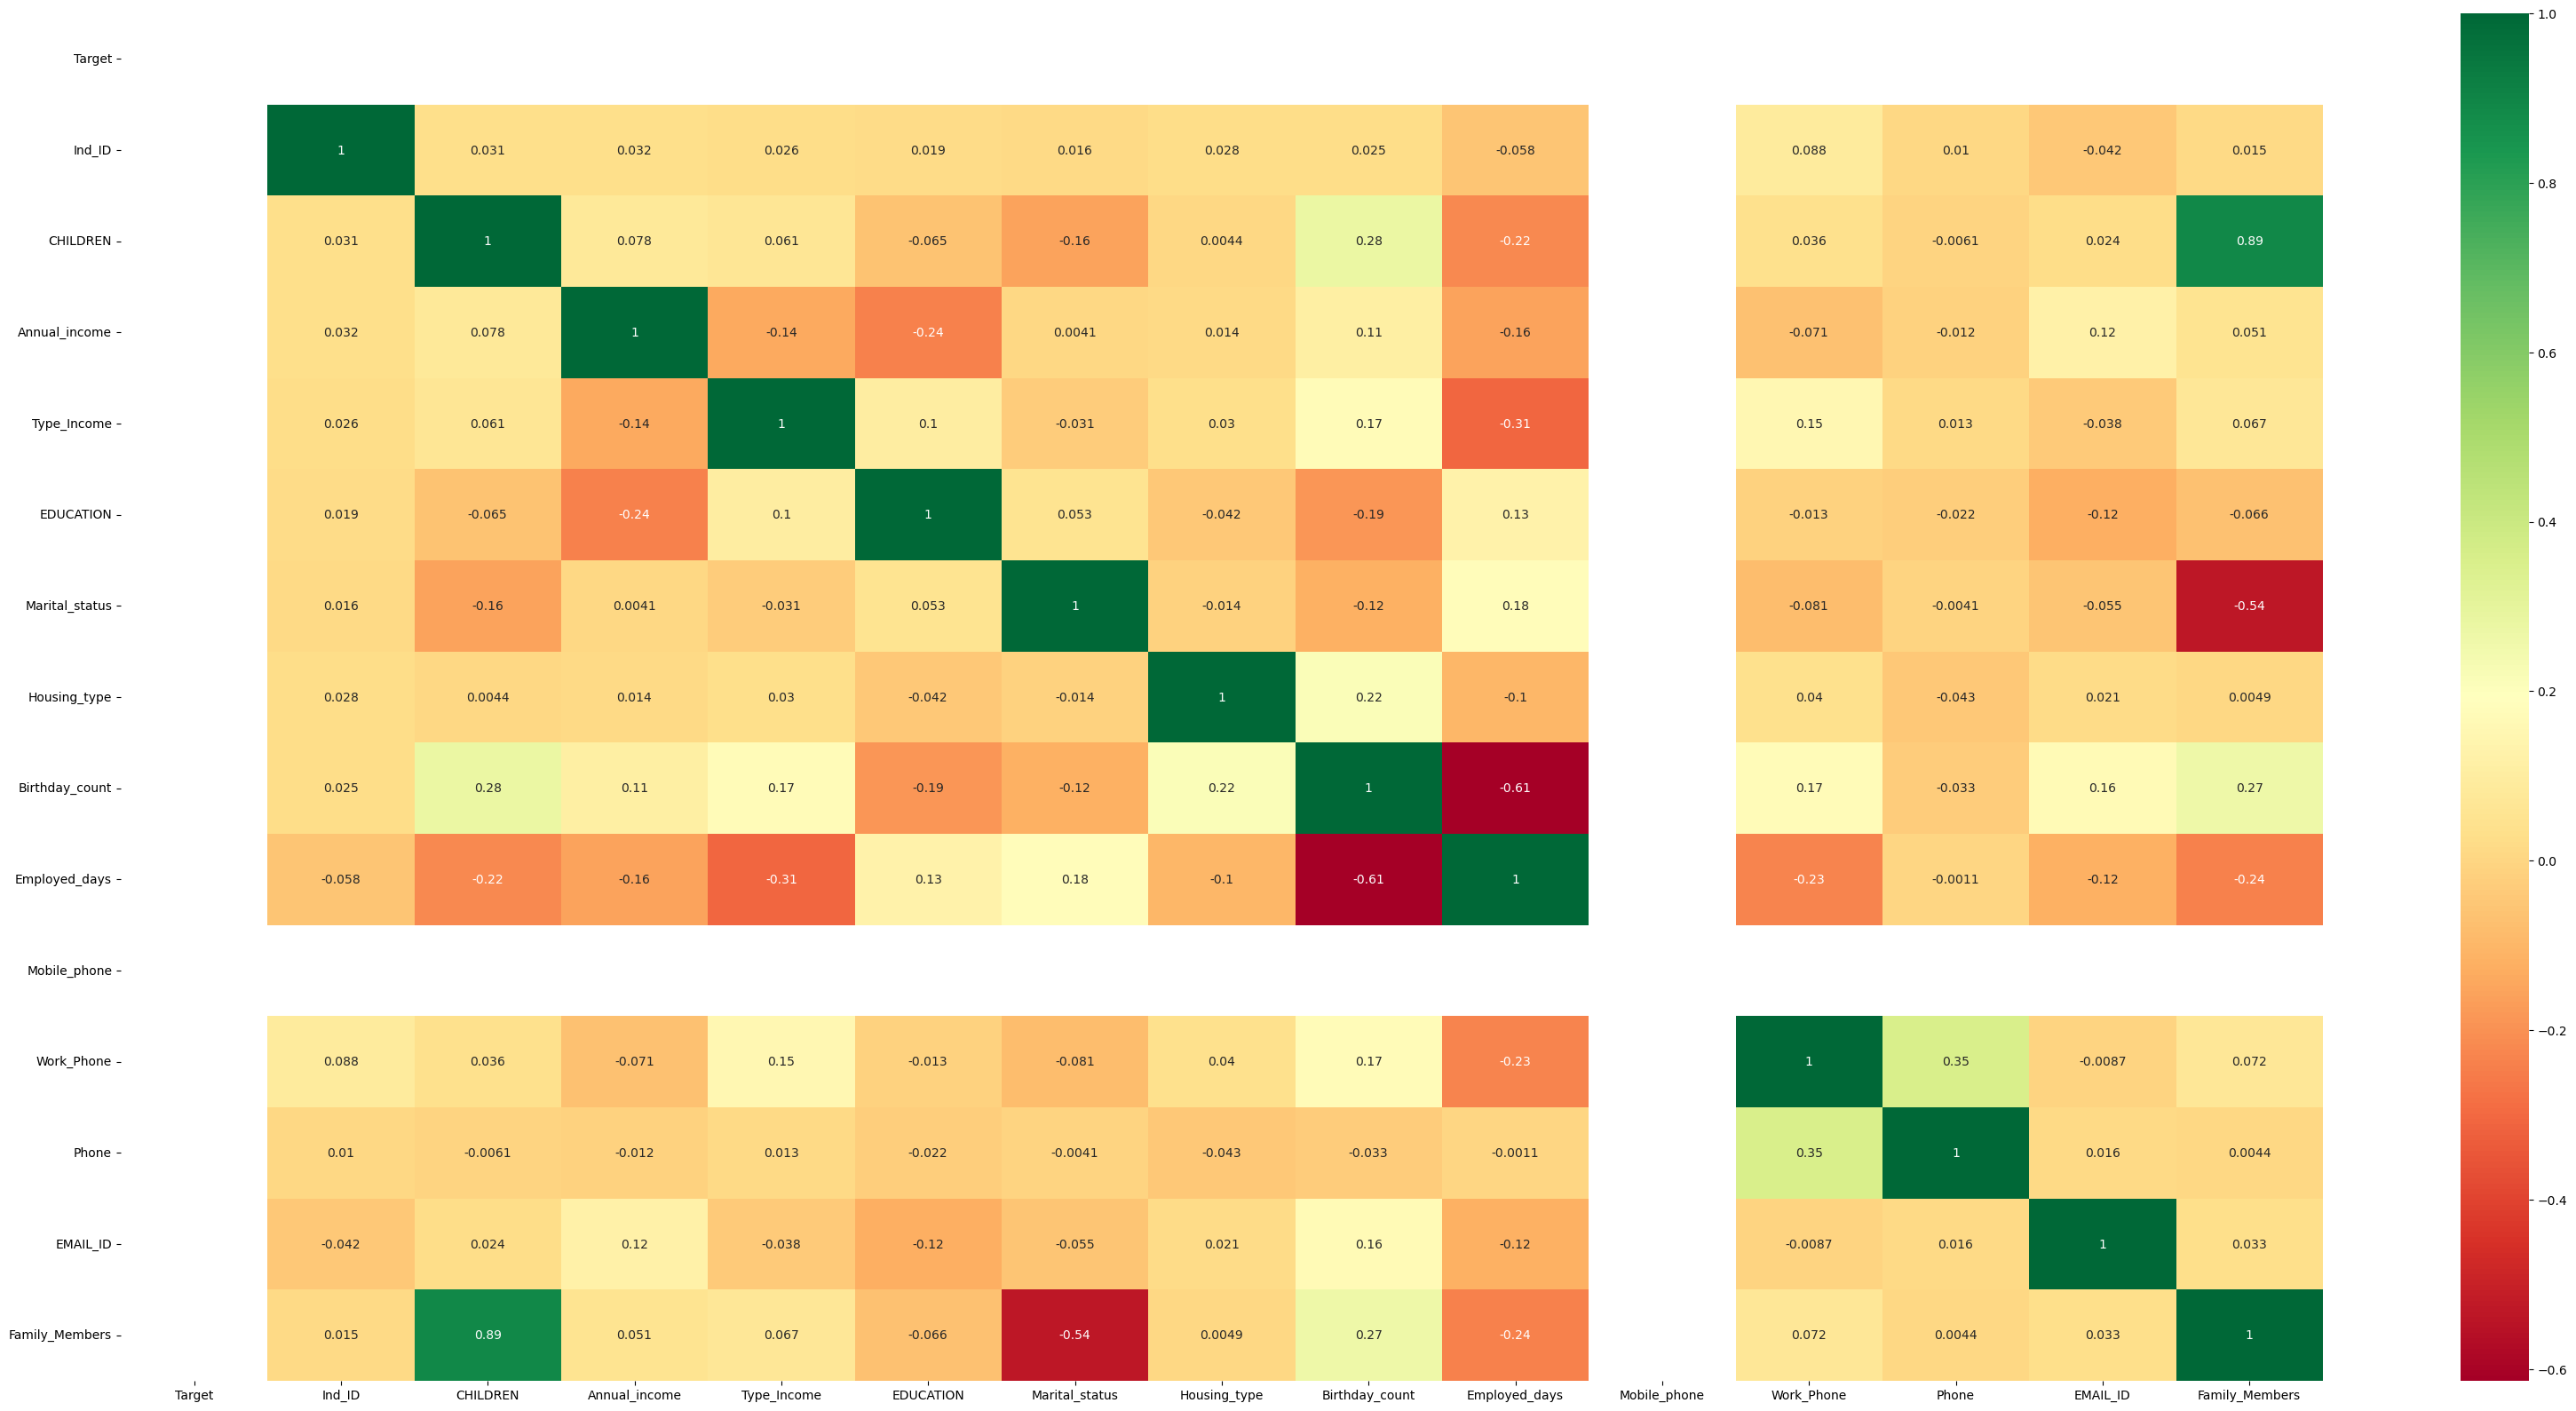

In [76]:
plt.figure(figsize=(40,20))
sns.heatmap(Cardapp.corr(),annot=True,cmap='RdYlGn')
 # Heat map to find correlation between features


# TRAINING THE MODEL

In [77]:
#split the data into features(x) and target variable(y)
X = Cardapp.drop('Target',axis=1)
y= Cardapp['Target']


In [78]:
# split the date into training and validation sets:
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [79]:
#Print the shapes of the split sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1232, 14)
X_test shape: (309, 14)
y_train shape: (1232,)
y_test shape: (309,)


## Model1- Linear Regression

In [80]:
# Importing MAE, rsq, MSE and liner regression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [81]:
lm = LinearRegression()
lm.fit(X_train,y_train)
# regression coefficients
print('Coefficients: ', lm.coef_)

Coefficients:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [82]:
y_pred = lm.predict(X_test)

#accuracy score
accuracyl = print(accuracy_score(y_test,y_pred)*100) 

#r2 score
print(r2_score(y_test,y_pred))


100.0
1.0


### Hyper parameter Tuning

In [83]:
confusion_mat=confusion_matrix(y_test, y_pred)
confusion_mat

array([[309]], dtype=int64)

In [84]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [85]:
# Lasso Regression (with hyperparameter tuning)
lasso = Lasso()
lasso_params = {'alpha': [0.1, 1, 10, 100]}  # Adjust alpha values as needed
lasso_grid = GridSearchCV(lasso, param_grid=lasso_params, scoring='neg_mean_squared_error', cv=5)
lasso_grid.fit(X_train, y_train)
lasso_best = lasso_grid.best_estimator_
lasso_pred = lasso_best.predict(X_test)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))

In [86]:
lr_accuracy = round(accuracy_score(y_test,lasso_pred)*100)
print(f"Accuracy score after tuning : {lr_accuracy}")

Accuracy score after tuning : 100


# Model2-Decision Tree

In [87]:
print(X_train.shape)
print(X_test.shape)

(1232, 14)
(309, 14)


In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create a Decision Tree model
model2 = DecisionTreeClassifier()

# Train the model on the training data
model2.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = model2.predict(X_test)

# Calculate the accuracy of the model
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
print(f"Decision Tree Accuracy Score for validation Data : {accuracy}")

Decision Tree Accuracy Score for validation Data : 100.0


In [89]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[309]]


In [90]:
#Metrics Before tuning the data

print(recall_score(y_test,y_pred, average='micro'))

print(precision_score(y_test,y_pred, average='micro'))

print(accuracy_score(y_test,y_pred))

#print(f1_score(y_test,pred, average='micro'))

print(r2_score(y_test,y_pred))


1.0
1.0
1.0
1.0


### Hyper parameter Tuning

In [91]:
# Define the hyperparameter grid to search for decision tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']}

# Create the GridSearchCV object
grid_search_dt = GridSearchCV(model2, param_grid_dt, cv=5, scoring='f1', n_jobs=-1)

grid_search_dt.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params_dt = grid_search_dt.best_params_
best_model_dt = grid_search_dt.best_estimator_
print(best_params_dt)
print(best_model_dt)

{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
DecisionTreeClassifier()


In [92]:
dt_mod_best = DecisionTreeClassifier(criterion = 'gini', max_depth= None, min_samples_leaf = 1, min_samples_split = 2)
dt_mod_best.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_best_dt = dt_mod_best.predict(X)
class_report_dt_best = classification_report(y, y_pred_best_dt)
print(f"Classification Report :\n {class_report_dt_best}")

Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1541

    accuracy                           1.00      1541
   macro avg       1.00      1.00      1.00      1541
weighted avg       1.00      1.00      1.00      1541



In [93]:
dtmodel_accuracy = round(accuracy_score(y, y_pred_best_dt)*100, 4)
print(f"Accuracy score after tuning : {dtmodel_accuracy}")

Accuracy score after tuning : 100.0


# Model3- Random Forest

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#Create a RandomForestClassifier model:
model3= RandomForestClassifier()

# train the model on the training data
model3.fit(X_train,y_train)

#Make prediction on the validation date
pred2 = model3.predict(X_test)

#Calculate the accuracy of the model:
accuracy = round(accuracy_score(y_test, pred2)*100,2)
print(f'Random Forest Accuracy Score for Validation Data: {accuracy}')

Random Forest Accuracy Score for Validation Data: 100.0


In [95]:
#Metrics Before tuning the data:

print(recall_score(y_test,pred2, average='micro'))

print(precision_score(y_test,pred2, average='micro'))

print(f1_score(y_test,pred2, average='micro'))

print(accuracy_score(y_test,pred2))

print(r2_score(y_test,pred2))



1.0
1.0
1.0
1.0
1.0


In [100]:
X =Cardapp.drop('Target', axis=1)
y = Cardapp['Target']

# Make predictions on the test data
y_pred = model3.predict(X)

# Calculate the accuracy of the model
accuracy = round(accuracy_score(y, y_pred)*100,4)
print(f"Random Forest Accuracy Score for Test Data: {accuracy}")

Random Forest Accuracy Score for Test Data: 100.0


### Hyper parameter Tuning

In [101]:
# Define the hyperparameter grid to search for random forest
param_grid_rf = {
    'n_estimators': [50, 50, 50],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']}

grid_search_rf = GridSearchCV(model3, param_grid_rf, cv=5, scoring='f1', n_jobs=-1)

grid_search_rf.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_
print(best_params_rf)
print(best_model_rf)

{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
RandomForestClassifier(n_estimators=50)


In [102]:
rf_mod_best = RandomForestClassifier(criterion = 'gini', max_depth= None, min_samples_leaf = 1, min_samples_split= 2, n_estimators= 50, random_state= 42)
rf_mod_best.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_best_rf = rf_mod_best.predict(X)
class_report_rf_best = classification_report(y, y_pred_best_rf)
print(f"Classification Report :\n {class_report_rf_best}")

Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1541

    accuracy                           1.00      1541
   macro avg       1.00      1.00      1.00      1541
weighted avg       1.00      1.00      1.00      1541



In [103]:
rfmodel_accuracy = round(accuracy_score(y, y_pred_best_rf)*100, 4)
print(f"Accuracy score after tuning : {rfmodel_accuracy}")

Accuracy score after tuning : 100.0


# Model4- Xgboost

In [104]:
!pip install xgboost

In [105]:
from xgboost import XGBClassifier, plot_tree
import xgboost as xgb
from sklearn.metrics import mean_squared_error
plt.style.use('ggplot')

In [106]:
# Make predictions and find accuracy on the validation data
from xgboost import XGBClassifier
from sklearn import metrics
xgb2=XGBClassifier()
xgb2.fit(X_train,y_train)
y_pred1=xgb2.predict(X_test)
accuracyg =metrics.accuracy_score(y_pred1,y_test)
print(accuracyg )

1.0


In [107]:
# Make predictions and find accuracy on the test data
X = Cardapp.drop('Target', axis=1)
y = Cardapp['Target']
xgb2=XGBClassifier()
xgb2.fit(X_train,y_train)
y_pred=xgb2.predict(X)
accuracyg =metrics.accuracy_score(y_pred,y)
print(accuracyg )

1.0


In [108]:
#Compute the rmse by invoking the mean_sqaured_error function from sklearn's
#metrics module.
rmse = np.sqrt(mean_squared_error(y_test, y_pred1))
print("RMSE: %f" % (rmse))


RMSE: 0.000000


In [109]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [110]:
#Invoking XGBoost's cv() method and store the results in a cv_results DataFrame
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
'max_depth': 5, 'alpha': 10}

In [111]:
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [112]:
# We have to Extract and print the final boosting round metric.
print((cv_results["test-rmse-mean"]).tail(1))

0    0.0
Name: test-rmse-mean, dtype: float64


In [113]:
from xgboost import XGBClassifier
from sklearn import metrics
xgb1=XGBClassifier(criterion = 'gini', max_depth= None, min_samples_leaf = 1, min_samples_split= 2, n_estimators= 50, random_state= 42)
xgb1.fit(X_train,y_train)
ypred=xgb1.predict(X)
accuracyg =metrics.accuracy_score(ypred,y)
print(accuracyg )

1.0


# Hyperparameter Tuning

In [114]:
# Define the hyperparameter grid to search for xgboost
param_grid_xg = {
    'n_estimators': [50, 50, 50],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']}

grid_search_xg = GridSearchCV(xgb2, param_grid_xg, cv=5, scoring='f1', n_jobs=-1)

grid_search_xg.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params_xg = grid_search_xg.best_params_
best_model_xg = grid_search_xg.best_estimator_
print(best_params_xg)
print(best_model_xg)

{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, criterion='gini', device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, min_samples_leaf=1, min_samples_split=2,
              missing=nan, monotone_constraints=None, multi_strategy=None,
              n_estimators=50, ...)


In [115]:
xg_mod_best = XGBClassifier(criterion = 'gini', max_depth= None, min_samples_leaf = 1, min_samples_split= 2, n_estimators= 50, random_state= 42)
xg_mod_best.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_best_xg = xg_mod_best.predict(X)
class_report_xg_best = classification_report(y, y_pred_best_xg)
print(f"Classification Report :\n {class_report_xg_best}")

Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1541

    accuracy                           1.00      1541
   macro avg       1.00      1.00      1.00      1541
weighted avg       1.00      1.00      1.00      1541



In [116]:
xgmodel_accuracy = round(accuracy_score(y,y_pred_best_xg)*100, 4)
print(f"Accuracy score after tuning : {xgmodel_accuracy}")

Accuracy score after tuning : 100.0


# Cross validation 

In [117]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score

In [118]:
?KNeighborsClassifier

In [119]:
Knn = KNeighborsClassifier(n_neighbors = 5, metric= 'euclidean')
Kfold = KFold(n_splits =5)
cv_result = cross_val_score(Knn, X,y,cv = 2)
cv_result
cv_result.mean()
cv_result.min()
cv_result.max()

1.0

# **Model Comparison**

### Before crossvalidation and hyperparameter tuning

In [120]:
new_df=pd.DataFrame({"Models":["log","decisiontree","randomforest","xgboostclassifier",'SVM'],"accuracies":[100, 100,100,100,100]})

In [121]:
new_df

Models  accuracies
0                log         100
1       decisiontree         100
2       randomforest         100
3  xgboostclassifier         100
4                SVM         100

<Axes: xlabel='Models', ylabel='accuracies'>

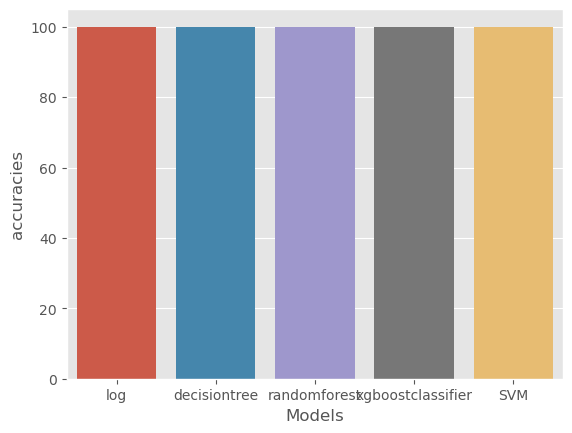

In [122]:
sns.barplot(new_df,x="Models",y="accuracies") # before crossvalidation and hyperparameter tuning

### After crossvalidation and hyperparameter tuning

In [123]:
import plotly.graph_objs as go
import plotly.offline as pyo

models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'xgboost']
accuracy_scores = [lr_accuracy, dtmodel_accuracy, rfmodel_accuracy, xgmodel_accuracy]

trace = go.Bar(
    x=models,
    y=accuracy_scores,
    text=[f'{score}%' for score in accuracy_scores],
    marker=dict(color='lightblue', line=dict(color='black', width=1.5)),
)

data = [trace]

layout = go.Layout(
    title='Comparison of Model Performance Metrics',
    xaxis=dict(title='Models'),
    yaxis=dict(title='Scores'),
)

fig = go.Figure(data=data, layout=layout)


pyo.iplot(fig)

#Model comparison DataFrame
accuracy_scores_with_percent = [f'{score}%' for score in accuracy_scores]
model_comparison_df = pd.DataFrame({'Model_Name': models, 'Accuracy Score': accuracy_scores_with_percent})
model_comparison_df = model_comparison_df.sort_values(by='Accuracy Score', ascending=False)
model_comparison_df.reset_index(drop=True, inplace=True)
print(model_comparison_df)

          Model_Name Accuracy Score
0      Decision Tree         100.0%
1      Random Forest         100.0%
2            xgboost         100.0%
3  Linear Regression           100%


## Conclusion:

**All the regression models like Decision Tree, Random Forest and xgboost have shown good accuracy which shows our dataset will perform better adding more data would probably help in better prediction.**

# Lets perform SQL Queries to get the Insights:

In [124]:
pip install mysql-connector-python

In [139]:
# import Libraries
import mysql.connector
from mysql.connector import Error
import pandas as pd


In [134]:
pip install duckdb

Note: you may need to restart the kernel to use updated packages.


In [137]:
cardapp2 = pd.read_csv('clean_data')

In [150]:
cardapp2.head(2)

Unnamed: 0   Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  \
0           0  5008827      M         Y             Y         0   
1           1  5009744      F         Y             N         0   

   Annual_income           Type_Income         EDUCATION Marital_status  \
0       180000.0             Pensioner  Higher education        Married   
1       315000.0  Commercial associate  Higher education        Married   

        Housing_type  Birthday_count  Employed_days  Mobile_phone  Work_Phone  \
0  House / apartment        -18772.0         365243             1           0   
1  House / apartment        -13557.0           -586             1           1   

   Phone  EMAIL_ID Type_Occupation  Family_Members  Target  
0      0         0           other               2       0  
1      1         0           other               2       0

In [146]:
import duckdb
conn=duckdb.connect()

In [148]:
conn.register("cardapp2",cardapp2)
conn.register("creditrecord",creditrecord)

##### **1) Group the customers based on their income type and find the average of their annual income.**

In [155]:
conn.execute("SELECT Type_income, Avg(Annual_income) as Average_income  FROM cardapp2 group by Type_income").fetchdf()

Type_Income  Average_income
0             Pensioner   154653.185393
1               Working   179968.392453
2         State servant   210130.434783
3  Commercial associate   233030.769231

##### **2) Find the female owners of cars and property..**


In [157]:
conn.execute("SELECT GENDER,Car_Owner, Propert_Owner FROM cardapp2 WHERE GENDER = 'F' AND Car_Owner  = 'Y' AND Propert_Owner='Y'").fetchdf()

GENDER Car_Owner Propert_Owner
0        F         Y             Y
1        F         Y             Y
2        F         Y             Y
3        F         Y             Y
4        F         Y             Y
..     ...       ...           ...
172      F         Y             Y
173      F         Y             Y
174      F         Y             Y
175      F         Y             Y
176      F         Y             Y

[177 rows x 3 columns]

#####  **3) Please list the top five people having the highest income..**

In [164]:
conn.execute("select Ind_ID, Annual_income FROM cardapp2 order by Annual_income desc limit 5 ").fetchdf()

Ind_ID  Annual_income
0  5143231      1575000.0
1  5143235      1575000.0
2  5090470       900000.0
3  5079016       900000.0
4  5079017       900000.0

##### **4)  Find the male customers who are staying with their families.**


In [166]:
conn.execute("select GENDER, Family_Members FROM cardapp2 where GENDER = 'M' and Family_Members != 0").fetchdf()

GENDER  Family_Members
0        M               2
1        M               3
2        M               3
3        M               1
4        M               3
..     ...             ...
563      M               2
564      M               2
565      M               3
566      M               4
567      M               2

[568 rows x 2 columns]

##### **5) How many married people are having bad credit?**


In [167]:
conn.execute("select  count(Marital_status) as Married from cardapp2 inner join creditrecord on cardapp2.Ind_ID = creditrecord.Ind_ID where label = 0 ").fetchdf()

Married
0     1371

##### **6)  What is the highest education level and what is the total count?**


In [197]:
conn.execute("Select count(EDUCATION) from cardapp2 where EDUCATION = 'Higher education'").fetchdf()

count(EDUCATION)
0               421

##### **7) Between married males and females, who is having more bad credit??**


In [212]:
conn.execute("select ANY_VALUE(GENDER), count(GENDER) from cardapp2 a inner join creditrecord c on a.Ind_ID = c.Ind_ID  where GENDER = 'M' and Marital_status = 'Married' and label = 0  Union all select ANY_VALUE(GENDER), count(GENDER) from cardapp2 a inner join creditrecord c on a.Ind_ID=c.Ind_ID where GENDER = 'F' and Marital_status = 'Married' and label = 0 ").fetchdf()

any_value(GENDER)  count(GENDER)
0                 M            368
1                 F            566

## Final Hypothesis¶

1. **Credit score based on gender Hypothesis:** It was seen that the creditscore of Male are good in comparison to Female.Therefore male are morelikely eligible for credit card. 

---

2. **Income based Hypothesis:** Average income of commercial associates is higher as comparision to others which make them eligible for credit card.

---

3. **Marriage based Hypthesis:** Many Married couples are having bad creditscores.

